In [4]:
cd /content/drive/MyDrive/vae

/content/drive/MyDrive/vae


In [6]:
!git clone https://github.com/1Konny/Beta-VAE.git

Cloning into 'Beta-VAE'...
remote: Enumerating objects: 204, done.
remote: Total 204 (delta 0), reused 0 (delta 0), pack-reused 204
Receiving objects: 100% (204/204), 3.95 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [7]:
cd Beta-VAE

/content/drive/MyDrive/vae/Beta-VAE


In [12]:
!./download_dsprites.sh

Cloning into 'dsprites-dataset'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.


In [11]:
!chmod 755 -R /content/drive/MyDrive/vae/Beta-VAE

In [44]:
import numpy as np

def GetCharMap(seq):
    invcharmap = []
    for s in seq:
        for c in s:
            if c not in invcharmap:
                invcharmap += c
    invcharmap = sorted(invcharmap)
    charmap = {}
    count = 0
    for c in invcharmap:
        charmap[c] = count
        count += 1
    return charmap,invcharmap

def seq2oh(Seqs,charmap):
    Onehot = []
    Length = len(Seqs[0])
    for i in range(len(Seqs)):
        line = np.zeros([Length,len(charmap)],dtype = 'float32')
        for j in range(Length):
            line[j,charmap[Seqs[i][j]]] = 1
        Onehot.append(line)
    Onehot = np.array(Onehot)
    return Onehot

def oh2seq(oh,invcharmap):
    Seqs = []
    for i in range(oh.shape[0]):
        seq = str()
        for j in range(oh.shape[1]):
            seq = seq + invcharmap[np.argmax(oh[i,j,:])]
        Seqs.append(seq)
    return Seqs

def saveseq(filename,seq):
    f = open(filename,'w')
    for i in range(len(seq)):
#        f.write('>'+str(i)+'\n')
        f.write(seq[i]+'\n')
    f.close()
    return

def load_seq_data(filename):
    seq = []
    with open(filename,'r') as f:
        for l in f:
            if l[0] == '>' or l[0] == '#':
                continue
            seq.append(str.strip(l))
    charmap,invcharmap = GetCharMap(seq)
    oh = seq2oh(seq,charmap)
    return oh,charmap,invcharmap

dataset, charmap,invcharmap = load_seq_data('/content/drive/MyDrive/gpro/promoter-seqs.fasta')
# dataset = np.expand_dims(dataset,3)
print(charmap)
# dataset = np.reshape(dataset,(4501,61,4))
print(dataset[0])
print(dataset.shape)

{'A': 0, 'C': 1, 'G': 2, 'T': 3}
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
(4501, 61, 4)


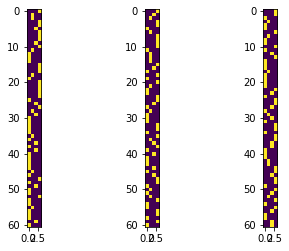

In [40]:
import matplotlib.pyplot as plt
# plt.figure(figsize = (2,4))
plt.subplot(131)
plt.imshow(dataset[0])
plt.subplot(132)
plt.imshow(dataset[1])
plt.subplot(133)
plt.imshow(dataset[2])
plt.show()

In [30]:
dataset1 = torchvision.datasets.MNIST(root='../../../data/minist',
                                     train=True,
                                     transform=transforms.ToTensor(),
                                     download=True)
print(type(dataset1))

<class 'torchvision.datasets.mnist.MNIST'>


In [94]:
# 包
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
#导入包
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np


# 设备配置
torch.cuda.set_device(0) # 这句用来设置pytorch在哪块GPU上运行
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 如果没有文件夹就创建一个文件夹
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# 超参数设置
# Hyper-parameters
image_size = 244  # 784
h_dim = 400
z_dim = 20
num_epochs = 1000
batch_size = 8
learning_rate = 1e-3

# dataset = torchvision.datasets.MNIST(root='../../../data/minist',
#                                      train=True,
#                                      transform=transforms.ToTensor(),
#                                      download=True)

# 数据加载器
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)

# VAE model
class VAE(nn.Module):           #784
    def __init__(self, image_size=244, h_dim=400, z_dim=20):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(image_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim) # 均值 向量
        self.fc3 = nn.Linear(h_dim, z_dim) # 保准方差 向量
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, image_size)
        
    # 编码过程
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    # 随机生成隐含向量
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    # 解码过程
    def decode(self, z):
        h = F.relu(self.fc4(z))
        return F.sigmoid(self.fc5(h))
    
    # 整个前向传播过程：编码-》解码
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

# 实例化一个模型
model = VAE().to(device)

# 创建优化器
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch[837/1000], Step [480/563], Reconst Loss: 709.3572, KL Div: 210.2398
Epoch[837/1000], Step [490/563], Reconst Loss: 771.8763, KL Div: 192.4882
Epoch[837/1000], Step [500/563], Reconst Loss: 707.7247, KL Div: 206.2994
Epoch[837/1000], Step [510/563], Reconst Loss: 654.4950, KL Div: 227.6306
Epoch[837/1000], Step [520/563], Reconst Loss: 677.0215, KL Div: 213.2995
Epoch[837/1000], Step [530/563], Reconst Loss: 571.7184, KL Div: 229.4594
Epoch[837/1000], Step [540/563], Reconst Loss: 659.5200, KL Div: 220.0644
Epoch[837/1000], Step [550/563], Reconst Loss: 676.1378, KL Div: 212.7041
Epoch[837/1000], Step [560/563], Reconst Loss: 758.5224, KL Div: 191.0261
837
(65, 52, 3)


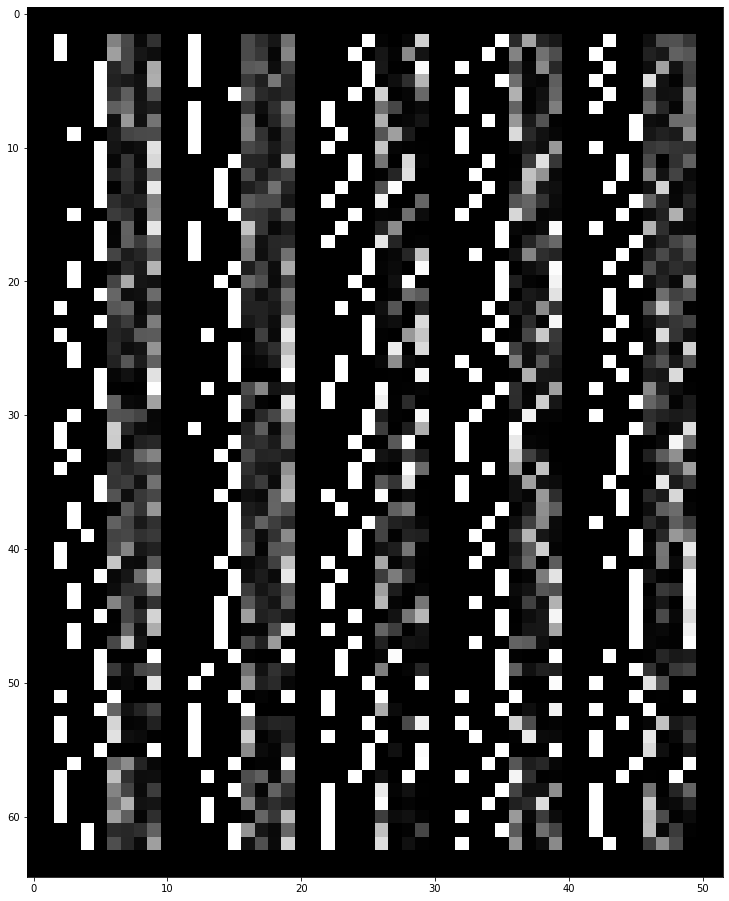

Epoch[838/1000], Step [10/563], Reconst Loss: 628.3409, KL Div: 205.5785
Epoch[838/1000], Step [20/563], Reconst Loss: 744.7981, KL Div: 191.8413
Epoch[838/1000], Step [30/563], Reconst Loss: 694.1296, KL Div: 196.1998
Epoch[838/1000], Step [40/563], Reconst Loss: 705.3376, KL Div: 202.2621
Epoch[838/1000], Step [50/563], Reconst Loss: 596.3724, KL Div: 225.0701
Epoch[838/1000], Step [60/563], Reconst Loss: 614.6030, KL Div: 222.4358
Epoch[838/1000], Step [70/563], Reconst Loss: 712.4577, KL Div: 196.8753
Epoch[838/1000], Step [80/563], Reconst Loss: 623.7482, KL Div: 228.7554
Epoch[838/1000], Step [90/563], Reconst Loss: 598.8324, KL Div: 229.2861
Epoch[838/1000], Step [100/563], Reconst Loss: 718.6599, KL Div: 198.0608
Epoch[838/1000], Step [110/563], Reconst Loss: 710.0548, KL Div: 194.3473
Epoch[838/1000], Step [120/563], Reconst Loss: 729.1300, KL Div: 203.5494
Epoch[838/1000], Step [130/563], Reconst Loss: 733.9524, KL Div: 207.0798
Epoch[838/1000], Step [140/563], Reconst Loss: 

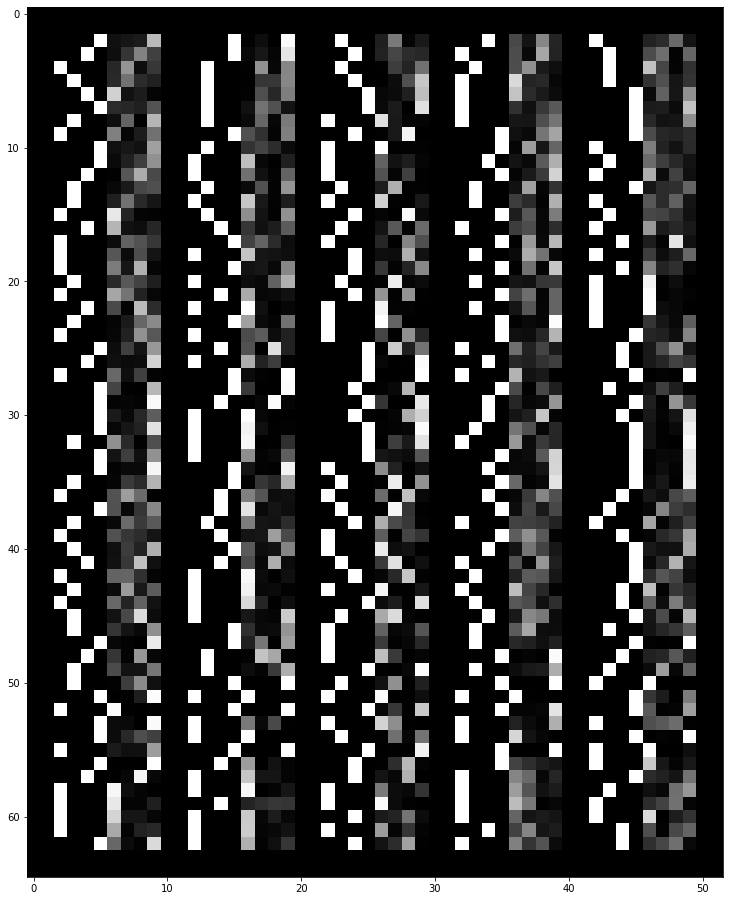

Epoch[839/1000], Step [10/563], Reconst Loss: 690.8571, KL Div: 204.3062
Epoch[839/1000], Step [20/563], Reconst Loss: 740.0883, KL Div: 197.5821
Epoch[839/1000], Step [30/563], Reconst Loss: 647.6440, KL Div: 198.8912
Epoch[839/1000], Step [40/563], Reconst Loss: 704.6093, KL Div: 211.0485
Epoch[839/1000], Step [50/563], Reconst Loss: 663.6584, KL Div: 206.9376
Epoch[839/1000], Step [60/563], Reconst Loss: 657.1482, KL Div: 206.2194
Epoch[839/1000], Step [70/563], Reconst Loss: 650.2487, KL Div: 219.8095
Epoch[839/1000], Step [80/563], Reconst Loss: 701.7750, KL Div: 201.6040
Epoch[839/1000], Step [90/563], Reconst Loss: 664.5197, KL Div: 218.0836
Epoch[839/1000], Step [100/563], Reconst Loss: 755.0751, KL Div: 196.9569
Epoch[839/1000], Step [110/563], Reconst Loss: 725.3203, KL Div: 202.4475
Epoch[839/1000], Step [120/563], Reconst Loss: 627.0278, KL Div: 230.4297
Epoch[839/1000], Step [130/563], Reconst Loss: 656.4783, KL Div: 214.4154
Epoch[839/1000], Step [140/563], Reconst Loss: 

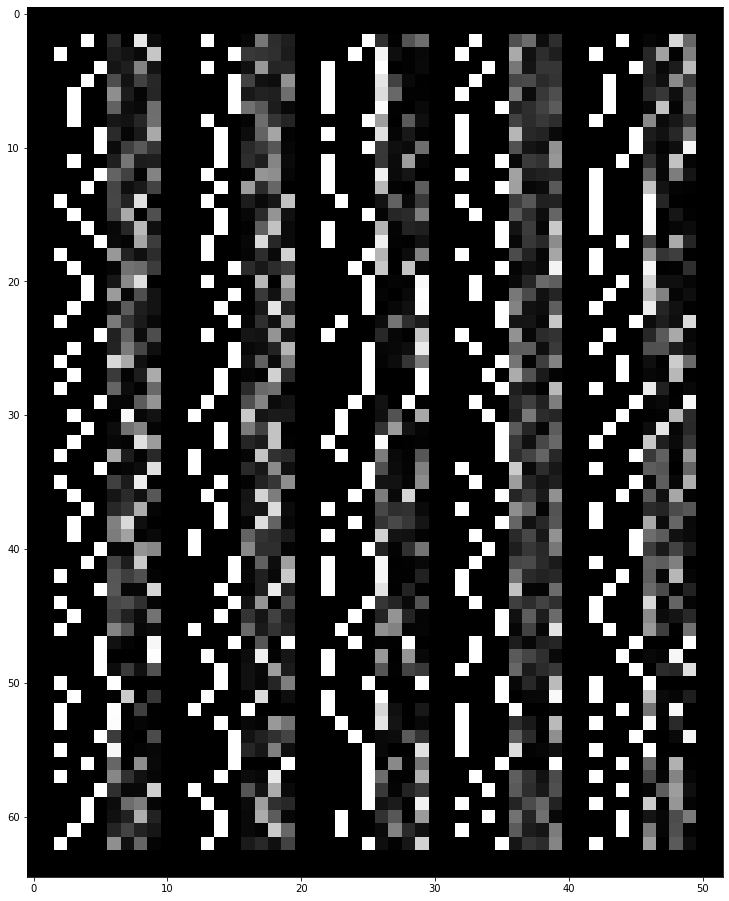

Epoch[840/1000], Step [10/563], Reconst Loss: 642.6316, KL Div: 222.7482
Epoch[840/1000], Step [20/563], Reconst Loss: 747.3895, KL Div: 194.4178
Epoch[840/1000], Step [30/563], Reconst Loss: 689.6847, KL Div: 205.9831
Epoch[840/1000], Step [40/563], Reconst Loss: 661.6784, KL Div: 208.7581
Epoch[840/1000], Step [50/563], Reconst Loss: 691.1266, KL Div: 206.7046
Epoch[840/1000], Step [60/563], Reconst Loss: 707.1226, KL Div: 198.5602
Epoch[840/1000], Step [70/563], Reconst Loss: 731.6480, KL Div: 196.0961
Epoch[840/1000], Step [80/563], Reconst Loss: 670.5216, KL Div: 215.8238
Epoch[840/1000], Step [90/563], Reconst Loss: 594.3752, KL Div: 231.8302
Epoch[840/1000], Step [100/563], Reconst Loss: 693.9615, KL Div: 203.6505
Epoch[840/1000], Step [110/563], Reconst Loss: 689.5117, KL Div: 208.0172
Epoch[840/1000], Step [120/563], Reconst Loss: 692.1513, KL Div: 211.2058
Epoch[840/1000], Step [130/563], Reconst Loss: 615.3842, KL Div: 234.8615
Epoch[840/1000], Step [140/563], Reconst Loss: 

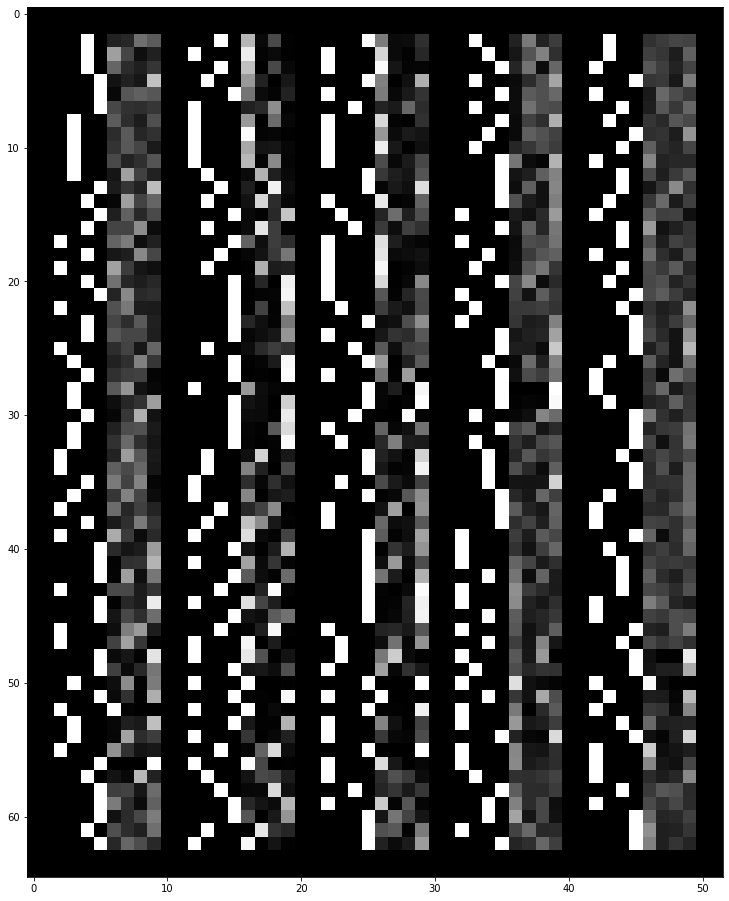

Epoch[841/1000], Step [10/563], Reconst Loss: 696.7877, KL Div: 209.1614
Epoch[841/1000], Step [20/563], Reconst Loss: 724.2922, KL Div: 202.6516
Epoch[841/1000], Step [30/563], Reconst Loss: 642.4972, KL Div: 219.7634
Epoch[841/1000], Step [40/563], Reconst Loss: 689.0626, KL Div: 200.9706
Epoch[841/1000], Step [50/563], Reconst Loss: 711.5809, KL Div: 209.5790
Epoch[841/1000], Step [60/563], Reconst Loss: 744.2400, KL Div: 192.7609
Epoch[841/1000], Step [70/563], Reconst Loss: 617.7137, KL Div: 219.9372
Epoch[841/1000], Step [80/563], Reconst Loss: 803.7988, KL Div: 182.3976
Epoch[841/1000], Step [90/563], Reconst Loss: 694.8508, KL Div: 197.8304
Epoch[841/1000], Step [100/563], Reconst Loss: 619.8787, KL Div: 221.2071
Epoch[841/1000], Step [110/563], Reconst Loss: 722.3797, KL Div: 196.2457
Epoch[841/1000], Step [120/563], Reconst Loss: 607.7906, KL Div: 209.5785
Epoch[841/1000], Step [130/563], Reconst Loss: 701.2676, KL Div: 199.1191
Epoch[841/1000], Step [140/563], Reconst Loss: 

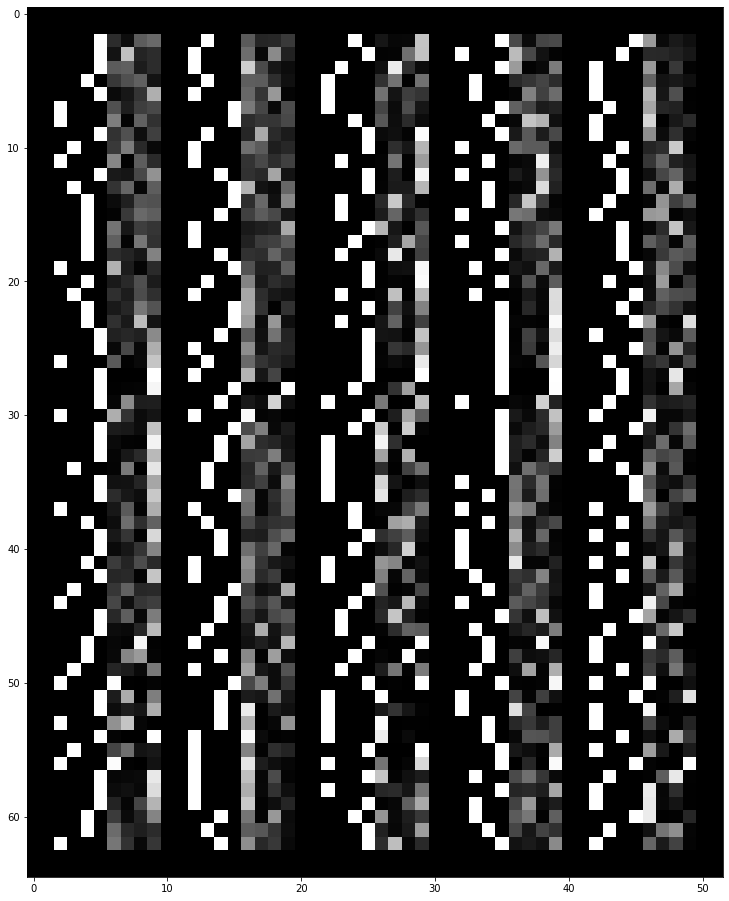

Epoch[842/1000], Step [10/563], Reconst Loss: 728.4437, KL Div: 190.9572
Epoch[842/1000], Step [20/563], Reconst Loss: 616.2880, KL Div: 229.6010
Epoch[842/1000], Step [30/563], Reconst Loss: 574.9626, KL Div: 224.3052
Epoch[842/1000], Step [40/563], Reconst Loss: 549.2328, KL Div: 238.8532
Epoch[842/1000], Step [50/563], Reconst Loss: 717.1432, KL Div: 202.3378
Epoch[842/1000], Step [60/563], Reconst Loss: 613.2747, KL Div: 211.1094
Epoch[842/1000], Step [70/563], Reconst Loss: 682.3018, KL Div: 212.5783
Epoch[842/1000], Step [80/563], Reconst Loss: 600.3470, KL Div: 219.9407
Epoch[842/1000], Step [90/563], Reconst Loss: 800.8541, KL Div: 193.7010
Epoch[842/1000], Step [100/563], Reconst Loss: 800.1050, KL Div: 179.2975
Epoch[842/1000], Step [110/563], Reconst Loss: 701.7037, KL Div: 200.8302
Epoch[842/1000], Step [120/563], Reconst Loss: 723.4736, KL Div: 204.7138
Epoch[842/1000], Step [130/563], Reconst Loss: 680.3006, KL Div: 206.8407
Epoch[842/1000], Step [140/563], Reconst Loss: 

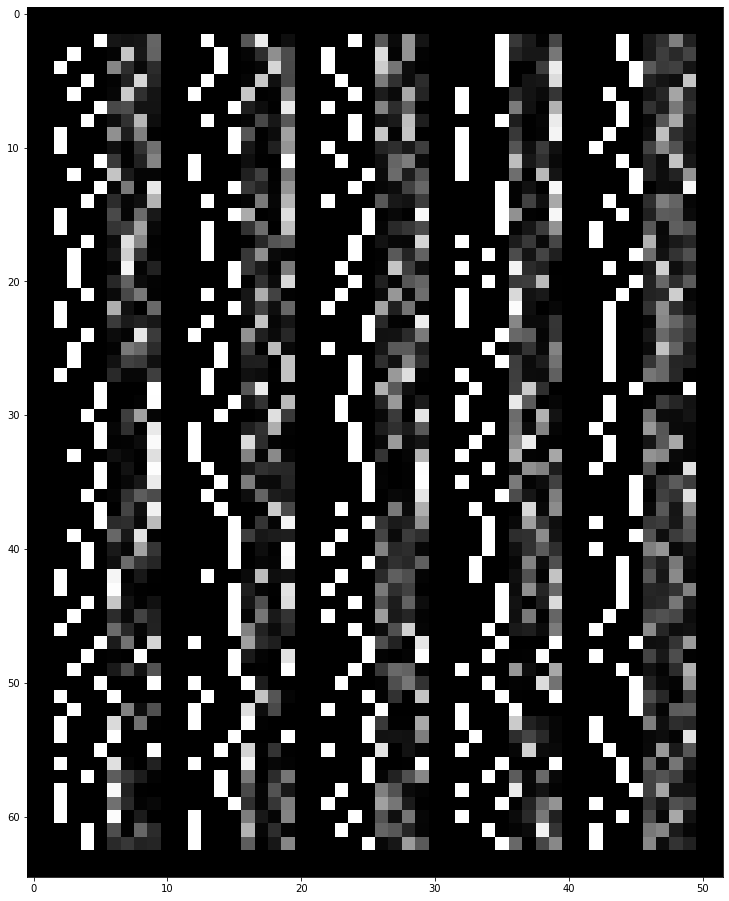

Epoch[843/1000], Step [10/563], Reconst Loss: 628.6958, KL Div: 213.2397
Epoch[843/1000], Step [20/563], Reconst Loss: 674.6880, KL Div: 211.7416
Epoch[843/1000], Step [30/563], Reconst Loss: 764.7180, KL Div: 209.7025
Epoch[843/1000], Step [40/563], Reconst Loss: 689.3386, KL Div: 215.7521
Epoch[843/1000], Step [50/563], Reconst Loss: 589.7695, KL Div: 233.0732
Epoch[843/1000], Step [60/563], Reconst Loss: 710.5190, KL Div: 197.6987
Epoch[843/1000], Step [70/563], Reconst Loss: 688.6211, KL Div: 210.4315
Epoch[843/1000], Step [80/563], Reconst Loss: 625.8794, KL Div: 220.2852
Epoch[843/1000], Step [90/563], Reconst Loss: 770.0693, KL Div: 197.2152
Epoch[843/1000], Step [100/563], Reconst Loss: 745.5123, KL Div: 191.6573
Epoch[843/1000], Step [110/563], Reconst Loss: 583.9935, KL Div: 235.0479
Epoch[843/1000], Step [120/563], Reconst Loss: 739.9062, KL Div: 196.6629
Epoch[843/1000], Step [130/563], Reconst Loss: 739.6431, KL Div: 189.1053
Epoch[843/1000], Step [140/563], Reconst Loss: 

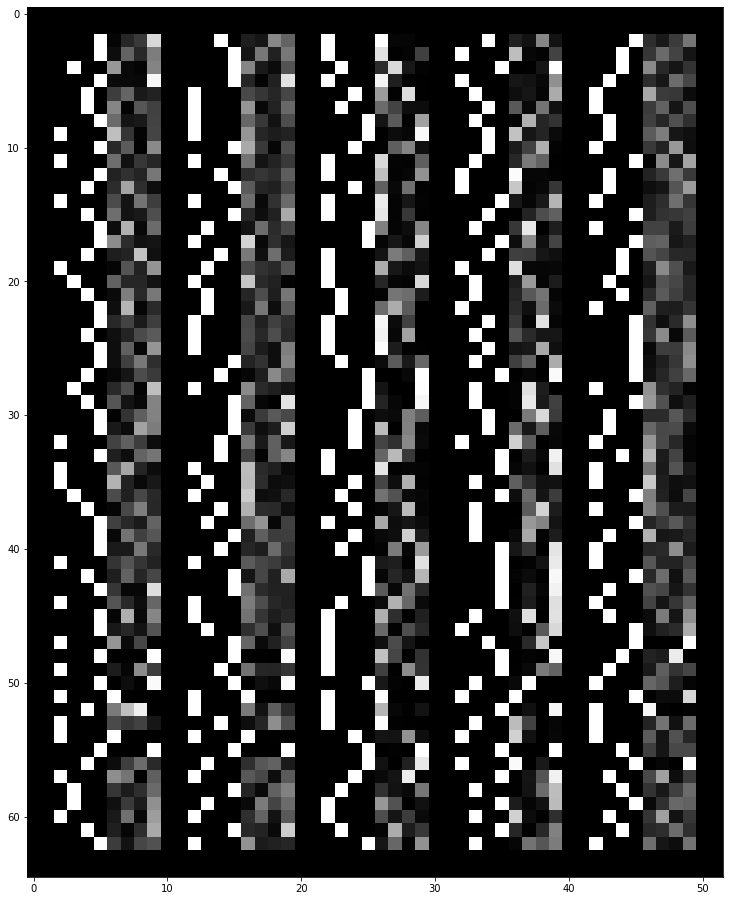

Epoch[844/1000], Step [10/563], Reconst Loss: 617.9644, KL Div: 234.7683
Epoch[844/1000], Step [20/563], Reconst Loss: 683.1709, KL Div: 219.3701
Epoch[844/1000], Step [30/563], Reconst Loss: 684.0320, KL Div: 212.3251
Epoch[844/1000], Step [40/563], Reconst Loss: 751.3559, KL Div: 189.7161
Epoch[844/1000], Step [50/563], Reconst Loss: 672.9526, KL Div: 212.4156
Epoch[844/1000], Step [60/563], Reconst Loss: 720.5911, KL Div: 209.0411
Epoch[844/1000], Step [70/563], Reconst Loss: 630.3191, KL Div: 216.5692
Epoch[844/1000], Step [80/563], Reconst Loss: 693.9296, KL Div: 204.6189
Epoch[844/1000], Step [90/563], Reconst Loss: 759.5543, KL Div: 189.7572
Epoch[844/1000], Step [100/563], Reconst Loss: 693.7463, KL Div: 212.5680
Epoch[844/1000], Step [110/563], Reconst Loss: 639.9962, KL Div: 212.7378
Epoch[844/1000], Step [120/563], Reconst Loss: 601.0406, KL Div: 225.4753
Epoch[844/1000], Step [130/563], Reconst Loss: 698.2743, KL Div: 215.8936
Epoch[844/1000], Step [140/563], Reconst Loss: 

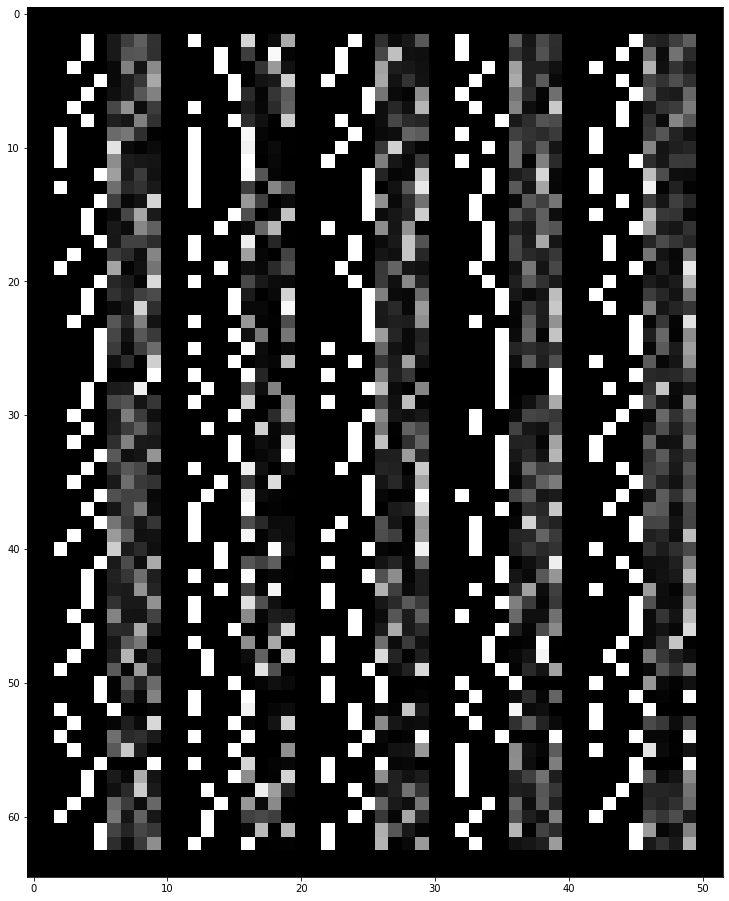

Epoch[845/1000], Step [10/563], Reconst Loss: 647.4807, KL Div: 229.0514
Epoch[845/1000], Step [20/563], Reconst Loss: 690.1842, KL Div: 207.2885
Epoch[845/1000], Step [30/563], Reconst Loss: 633.1758, KL Div: 219.0564
Epoch[845/1000], Step [40/563], Reconst Loss: 676.2845, KL Div: 200.2805
Epoch[845/1000], Step [50/563], Reconst Loss: 664.8309, KL Div: 207.2169
Epoch[845/1000], Step [60/563], Reconst Loss: 735.3003, KL Div: 198.6029
Epoch[845/1000], Step [70/563], Reconst Loss: 551.5327, KL Div: 231.8083
Epoch[845/1000], Step [80/563], Reconst Loss: 655.6937, KL Div: 215.0313
Epoch[845/1000], Step [90/563], Reconst Loss: 693.3489, KL Div: 207.8320
Epoch[845/1000], Step [100/563], Reconst Loss: 719.3951, KL Div: 192.3016
Epoch[845/1000], Step [110/563], Reconst Loss: 742.6779, KL Div: 197.7170
Epoch[845/1000], Step [120/563], Reconst Loss: 690.5062, KL Div: 206.2796
Epoch[845/1000], Step [130/563], Reconst Loss: 842.9253, KL Div: 177.8252
Epoch[845/1000], Step [140/563], Reconst Loss: 

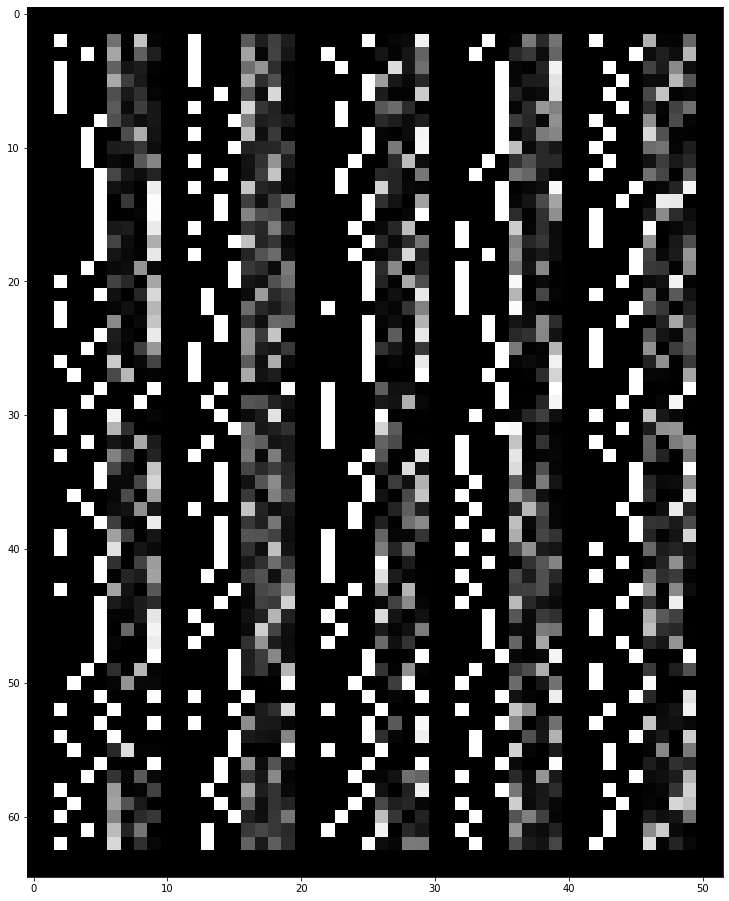

Epoch[846/1000], Step [10/563], Reconst Loss: 743.9521, KL Div: 205.4619
Epoch[846/1000], Step [20/563], Reconst Loss: 632.0481, KL Div: 211.4823
Epoch[846/1000], Step [30/563], Reconst Loss: 660.5068, KL Div: 209.6813
Epoch[846/1000], Step [40/563], Reconst Loss: 730.0066, KL Div: 202.1685
Epoch[846/1000], Step [50/563], Reconst Loss: 721.8086, KL Div: 198.7478
Epoch[846/1000], Step [60/563], Reconst Loss: 719.6542, KL Div: 201.9586
Epoch[846/1000], Step [70/563], Reconst Loss: 718.5320, KL Div: 201.1915
Epoch[846/1000], Step [80/563], Reconst Loss: 729.9924, KL Div: 201.4099
Epoch[846/1000], Step [90/563], Reconst Loss: 590.0731, KL Div: 225.0163
Epoch[846/1000], Step [100/563], Reconst Loss: 660.9185, KL Div: 216.9203
Epoch[846/1000], Step [110/563], Reconst Loss: 713.2805, KL Div: 202.0390
Epoch[846/1000], Step [120/563], Reconst Loss: 662.6595, KL Div: 218.6442
Epoch[846/1000], Step [130/563], Reconst Loss: 701.2300, KL Div: 204.2000
Epoch[846/1000], Step [140/563], Reconst Loss: 

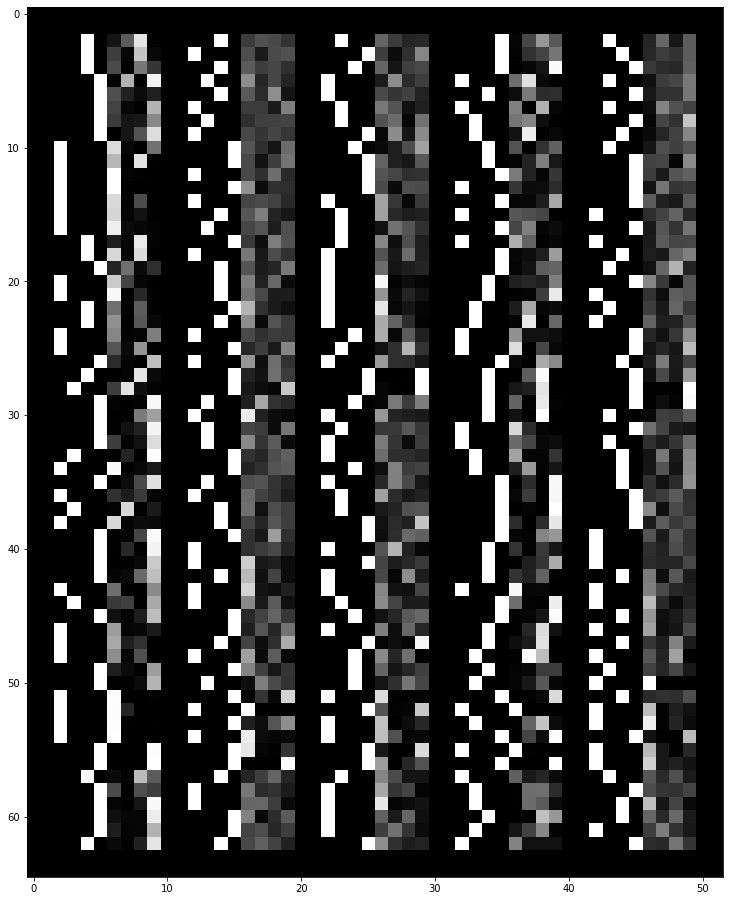

Epoch[847/1000], Step [10/563], Reconst Loss: 680.6594, KL Div: 212.0422
Epoch[847/1000], Step [20/563], Reconst Loss: 643.8277, KL Div: 213.1393
Epoch[847/1000], Step [30/563], Reconst Loss: 607.6964, KL Div: 220.5066
Epoch[847/1000], Step [40/563], Reconst Loss: 721.7229, KL Div: 199.7311
Epoch[847/1000], Step [50/563], Reconst Loss: 655.2372, KL Div: 213.5023
Epoch[847/1000], Step [60/563], Reconst Loss: 625.8916, KL Div: 217.7431
Epoch[847/1000], Step [70/563], Reconst Loss: 658.6802, KL Div: 217.3992
Epoch[847/1000], Step [80/563], Reconst Loss: 729.9377, KL Div: 197.1112
Epoch[847/1000], Step [90/563], Reconst Loss: 724.6235, KL Div: 194.8093
Epoch[847/1000], Step [100/563], Reconst Loss: 755.8701, KL Div: 207.7028
Epoch[847/1000], Step [110/563], Reconst Loss: 681.7993, KL Div: 204.5840
Epoch[847/1000], Step [120/563], Reconst Loss: 729.1655, KL Div: 199.8220
Epoch[847/1000], Step [130/563], Reconst Loss: 590.3381, KL Div: 227.7322
Epoch[847/1000], Step [140/563], Reconst Loss: 

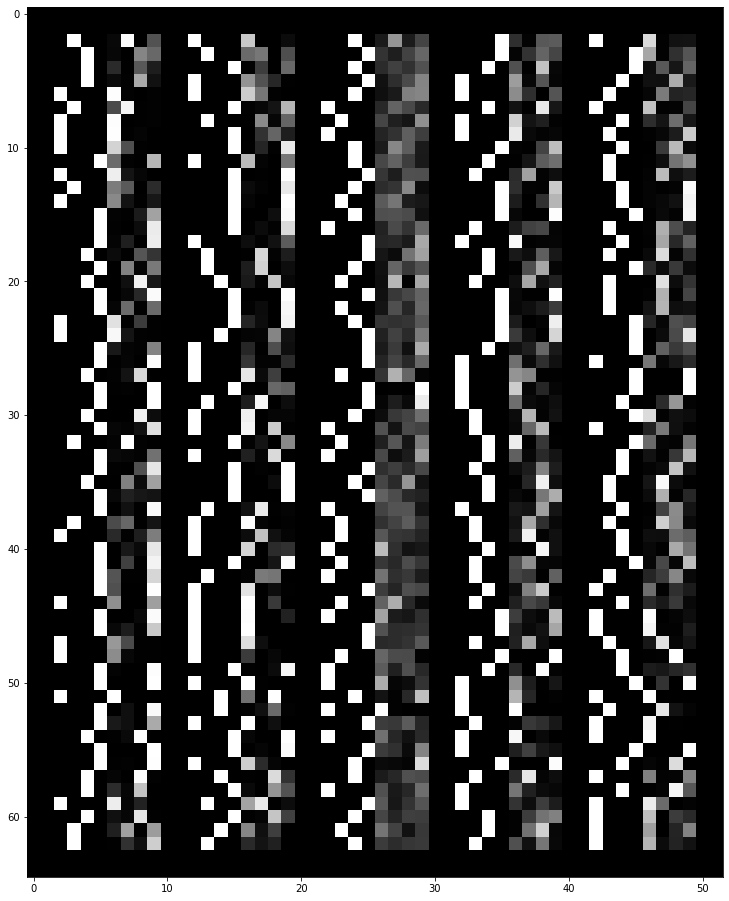

Epoch[848/1000], Step [10/563], Reconst Loss: 683.6685, KL Div: 202.4918
Epoch[848/1000], Step [20/563], Reconst Loss: 740.9388, KL Div: 202.8600
Epoch[848/1000], Step [30/563], Reconst Loss: 621.9200, KL Div: 205.6271
Epoch[848/1000], Step [40/563], Reconst Loss: 626.2704, KL Div: 218.6594
Epoch[848/1000], Step [50/563], Reconst Loss: 611.3260, KL Div: 227.9809
Epoch[848/1000], Step [60/563], Reconst Loss: 712.2177, KL Div: 201.8310
Epoch[848/1000], Step [70/563], Reconst Loss: 675.5682, KL Div: 198.8123
Epoch[848/1000], Step [80/563], Reconst Loss: 597.8893, KL Div: 222.5198
Epoch[848/1000], Step [90/563], Reconst Loss: 677.2060, KL Div: 210.3036
Epoch[848/1000], Step [100/563], Reconst Loss: 644.3981, KL Div: 214.3205
Epoch[848/1000], Step [110/563], Reconst Loss: 633.3698, KL Div: 219.8189
Epoch[848/1000], Step [120/563], Reconst Loss: 597.8494, KL Div: 222.2061
Epoch[848/1000], Step [130/563], Reconst Loss: 645.9017, KL Div: 213.4570
Epoch[848/1000], Step [140/563], Reconst Loss: 

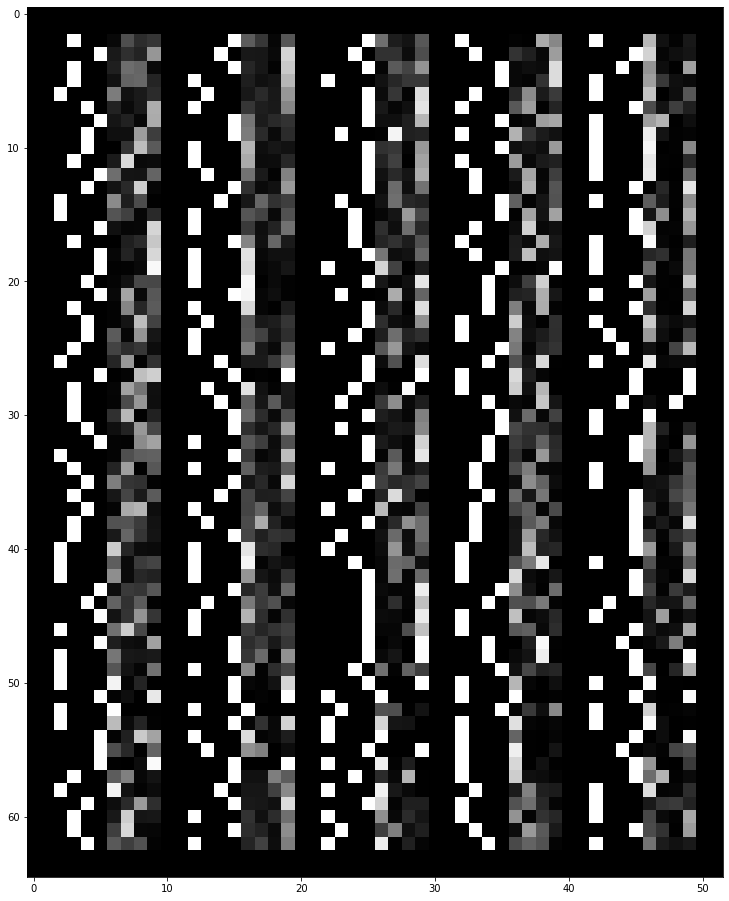

Epoch[849/1000], Step [10/563], Reconst Loss: 678.4335, KL Div: 201.5386
Epoch[849/1000], Step [20/563], Reconst Loss: 688.2635, KL Div: 205.1168
Epoch[849/1000], Step [30/563], Reconst Loss: 652.0601, KL Div: 207.4691
Epoch[849/1000], Step [40/563], Reconst Loss: 583.9265, KL Div: 225.8272
Epoch[849/1000], Step [50/563], Reconst Loss: 631.0563, KL Div: 210.4482
Epoch[849/1000], Step [60/563], Reconst Loss: 712.4996, KL Div: 207.8531
Epoch[849/1000], Step [70/563], Reconst Loss: 622.9061, KL Div: 230.0319
Epoch[849/1000], Step [80/563], Reconst Loss: 700.8589, KL Div: 196.4683
Epoch[849/1000], Step [90/563], Reconst Loss: 697.3021, KL Div: 208.9436
Epoch[849/1000], Step [100/563], Reconst Loss: 699.0392, KL Div: 201.9946
Epoch[849/1000], Step [110/563], Reconst Loss: 641.6399, KL Div: 207.7933
Epoch[849/1000], Step [120/563], Reconst Loss: 697.4612, KL Div: 207.1423
Epoch[849/1000], Step [130/563], Reconst Loss: 680.7708, KL Div: 211.2182
Epoch[849/1000], Step [140/563], Reconst Loss: 

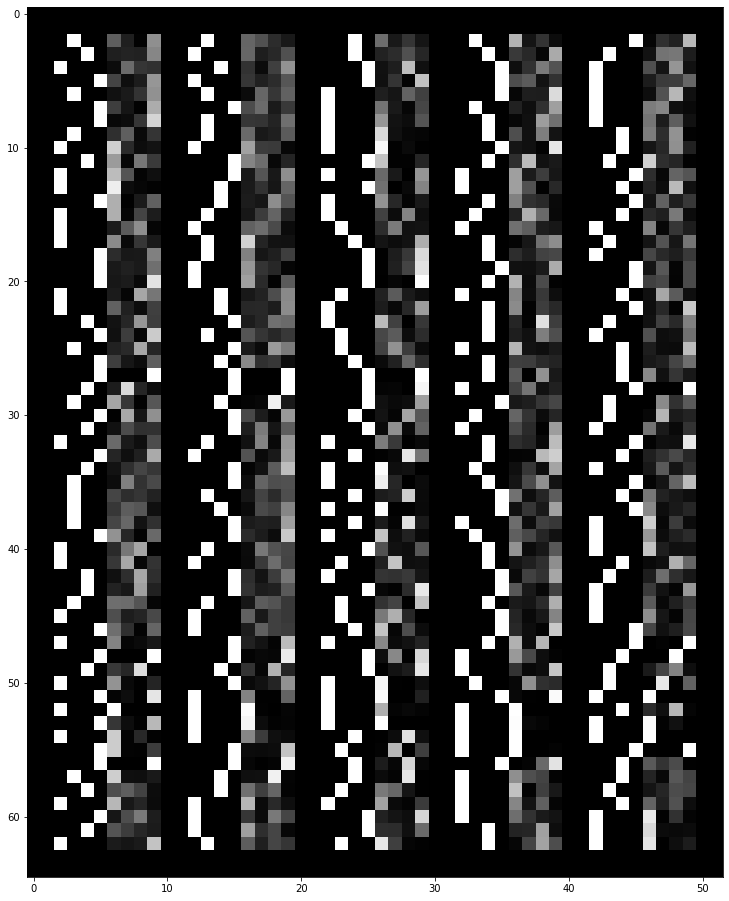

Epoch[850/1000], Step [10/563], Reconst Loss: 763.3160, KL Div: 196.1031
Epoch[850/1000], Step [20/563], Reconst Loss: 650.3348, KL Div: 209.6353
Epoch[850/1000], Step [30/563], Reconst Loss: 664.1940, KL Div: 198.7957
Epoch[850/1000], Step [40/563], Reconst Loss: 661.8444, KL Div: 218.7090
Epoch[850/1000], Step [50/563], Reconst Loss: 662.4211, KL Div: 215.8709
Epoch[850/1000], Step [60/563], Reconst Loss: 712.3825, KL Div: 209.7446
Epoch[850/1000], Step [70/563], Reconst Loss: 577.9230, KL Div: 216.6907
Epoch[850/1000], Step [80/563], Reconst Loss: 656.7424, KL Div: 212.7720
Epoch[850/1000], Step [90/563], Reconst Loss: 774.7809, KL Div: 191.1461
Epoch[850/1000], Step [100/563], Reconst Loss: 720.7751, KL Div: 209.7999
Epoch[850/1000], Step [110/563], Reconst Loss: 689.6877, KL Div: 208.1792
Epoch[850/1000], Step [120/563], Reconst Loss: 677.8720, KL Div: 213.0039
Epoch[850/1000], Step [130/563], Reconst Loss: 777.2018, KL Div: 187.1118
Epoch[850/1000], Step [140/563], Reconst Loss: 

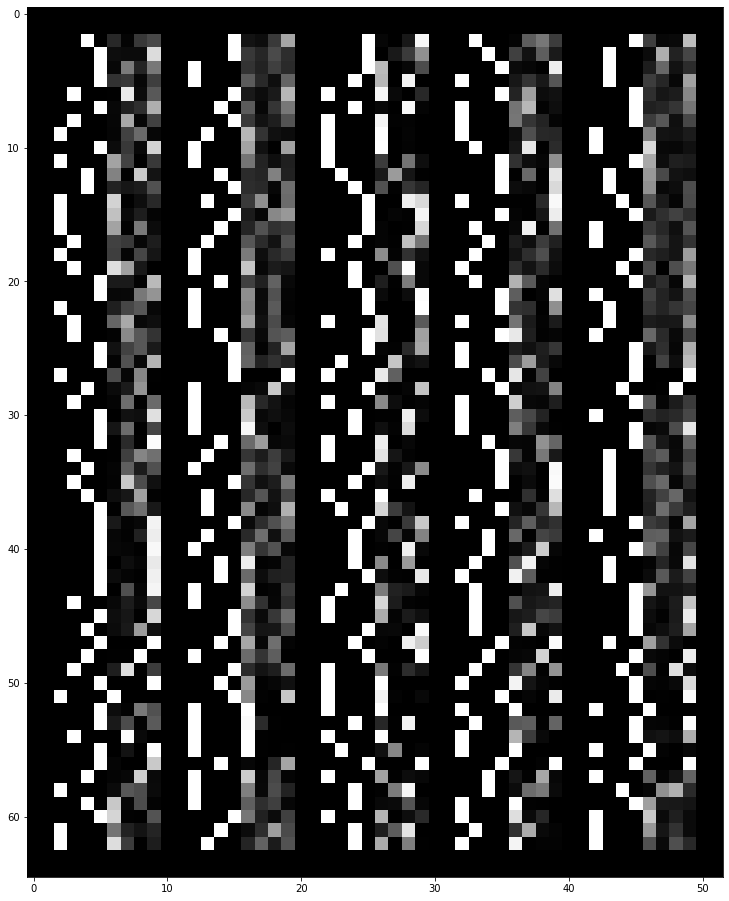

Epoch[851/1000], Step [10/563], Reconst Loss: 741.4943, KL Div: 202.9262
Epoch[851/1000], Step [20/563], Reconst Loss: 703.5446, KL Div: 189.6103
Epoch[851/1000], Step [30/563], Reconst Loss: 601.6965, KL Div: 228.2766
Epoch[851/1000], Step [40/563], Reconst Loss: 662.5533, KL Div: 209.2785
Epoch[851/1000], Step [50/563], Reconst Loss: 673.9657, KL Div: 212.4944
Epoch[851/1000], Step [60/563], Reconst Loss: 714.4750, KL Div: 201.4322
Epoch[851/1000], Step [70/563], Reconst Loss: 737.0130, KL Div: 189.7147
Epoch[851/1000], Step [80/563], Reconst Loss: 636.3823, KL Div: 208.8680
Epoch[851/1000], Step [90/563], Reconst Loss: 707.7943, KL Div: 195.2178
Epoch[851/1000], Step [100/563], Reconst Loss: 717.8800, KL Div: 196.7433
Epoch[851/1000], Step [110/563], Reconst Loss: 677.3646, KL Div: 207.4720
Epoch[851/1000], Step [120/563], Reconst Loss: 747.6058, KL Div: 189.6534
Epoch[851/1000], Step [130/563], Reconst Loss: 716.8221, KL Div: 201.3999
Epoch[851/1000], Step [140/563], Reconst Loss: 

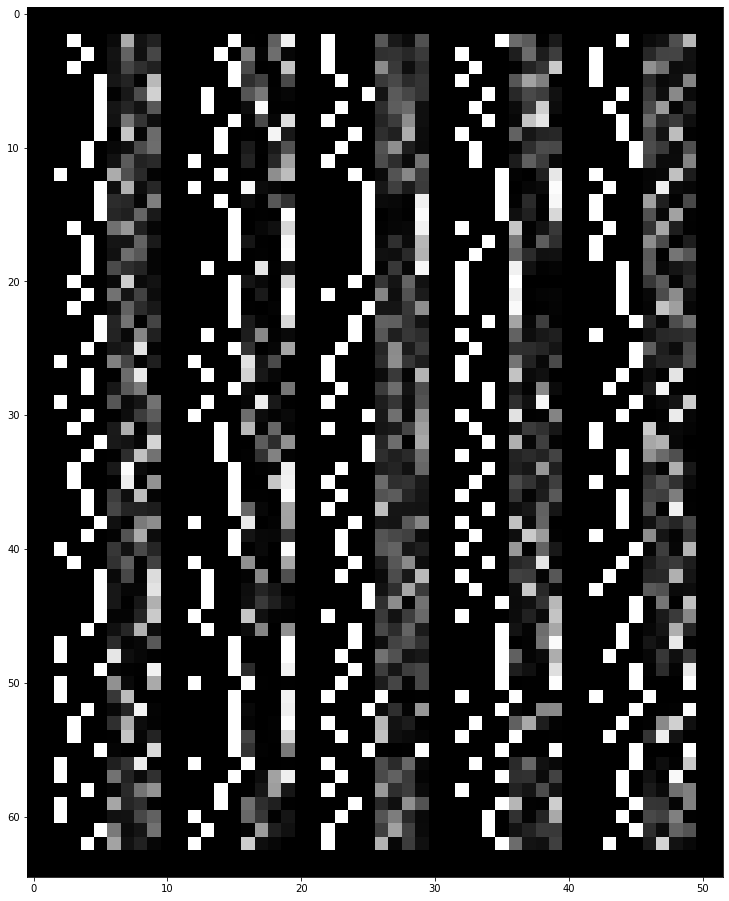

Epoch[852/1000], Step [10/563], Reconst Loss: 695.8215, KL Div: 205.2425
Epoch[852/1000], Step [20/563], Reconst Loss: 571.0875, KL Div: 225.0905
Epoch[852/1000], Step [30/563], Reconst Loss: 678.3048, KL Div: 205.8253
Epoch[852/1000], Step [40/563], Reconst Loss: 753.9449, KL Div: 190.1246
Epoch[852/1000], Step [50/563], Reconst Loss: 759.0515, KL Div: 191.8480
Epoch[852/1000], Step [60/563], Reconst Loss: 661.3959, KL Div: 208.1886
Epoch[852/1000], Step [70/563], Reconst Loss: 672.1014, KL Div: 210.2644
Epoch[852/1000], Step [80/563], Reconst Loss: 615.4073, KL Div: 211.4006
Epoch[852/1000], Step [90/563], Reconst Loss: 650.3306, KL Div: 207.7375
Epoch[852/1000], Step [100/563], Reconst Loss: 668.3503, KL Div: 214.3087
Epoch[852/1000], Step [110/563], Reconst Loss: 667.2047, KL Div: 209.9490
Epoch[852/1000], Step [120/563], Reconst Loss: 722.8267, KL Div: 203.6740
Epoch[852/1000], Step [130/563], Reconst Loss: 679.9430, KL Div: 211.6526
Epoch[852/1000], Step [140/563], Reconst Loss: 

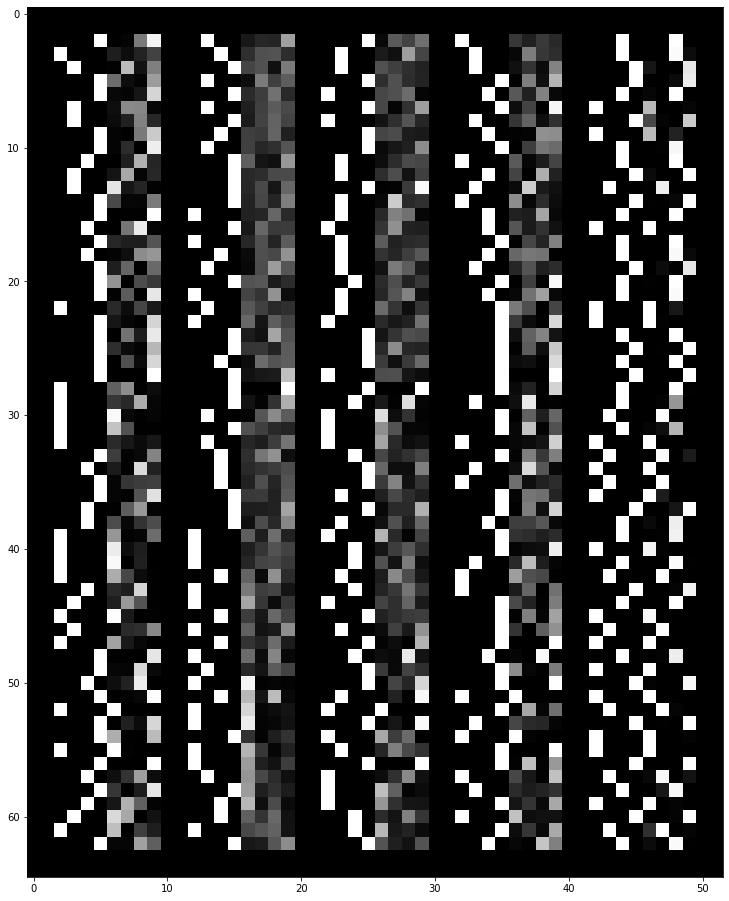

Epoch[853/1000], Step [10/563], Reconst Loss: 640.6478, KL Div: 205.5981
Epoch[853/1000], Step [20/563], Reconst Loss: 722.0433, KL Div: 205.6276
Epoch[853/1000], Step [30/563], Reconst Loss: 705.2791, KL Div: 207.6270
Epoch[853/1000], Step [40/563], Reconst Loss: 749.2507, KL Div: 211.0849
Epoch[853/1000], Step [50/563], Reconst Loss: 673.8878, KL Div: 214.6011
Epoch[853/1000], Step [60/563], Reconst Loss: 665.5159, KL Div: 219.7573
Epoch[853/1000], Step [70/563], Reconst Loss: 674.8954, KL Div: 209.9772
Epoch[853/1000], Step [80/563], Reconst Loss: 540.9307, KL Div: 205.2436
Epoch[853/1000], Step [90/563], Reconst Loss: 668.2531, KL Div: 204.1988
Epoch[853/1000], Step [100/563], Reconst Loss: 688.4205, KL Div: 207.0965
Epoch[853/1000], Step [110/563], Reconst Loss: 700.8452, KL Div: 197.8507
Epoch[853/1000], Step [120/563], Reconst Loss: 713.7419, KL Div: 208.4872
Epoch[853/1000], Step [130/563], Reconst Loss: 726.5491, KL Div: 201.5090
Epoch[853/1000], Step [140/563], Reconst Loss: 

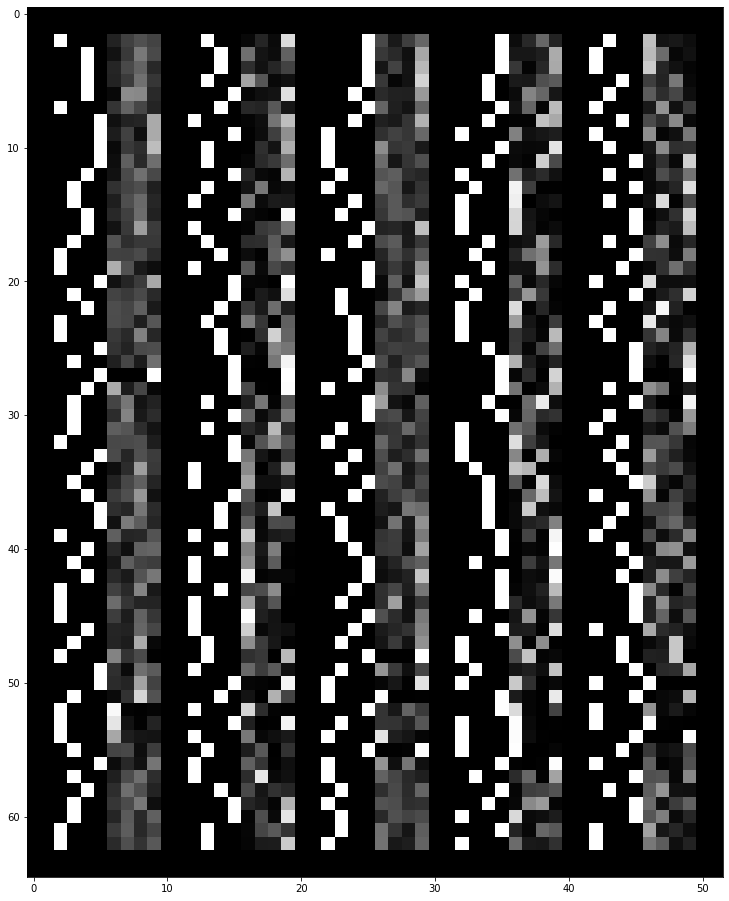

Epoch[854/1000], Step [10/563], Reconst Loss: 706.4144, KL Div: 205.4804
Epoch[854/1000], Step [20/563], Reconst Loss: 687.4608, KL Div: 209.3488
Epoch[854/1000], Step [30/563], Reconst Loss: 838.4653, KL Div: 190.3989
Epoch[854/1000], Step [40/563], Reconst Loss: 792.7249, KL Div: 186.9193
Epoch[854/1000], Step [50/563], Reconst Loss: 730.9056, KL Div: 188.9502
Epoch[854/1000], Step [60/563], Reconst Loss: 711.6091, KL Div: 209.1590
Epoch[854/1000], Step [70/563], Reconst Loss: 774.2275, KL Div: 189.6616
Epoch[854/1000], Step [80/563], Reconst Loss: 681.2496, KL Div: 206.0729
Epoch[854/1000], Step [90/563], Reconst Loss: 674.2108, KL Div: 200.1519
Epoch[854/1000], Step [100/563], Reconst Loss: 643.9923, KL Div: 217.5343
Epoch[854/1000], Step [110/563], Reconst Loss: 726.3491, KL Div: 197.8995
Epoch[854/1000], Step [120/563], Reconst Loss: 743.6236, KL Div: 192.6466
Epoch[854/1000], Step [130/563], Reconst Loss: 771.8938, KL Div: 191.7409
Epoch[854/1000], Step [140/563], Reconst Loss: 

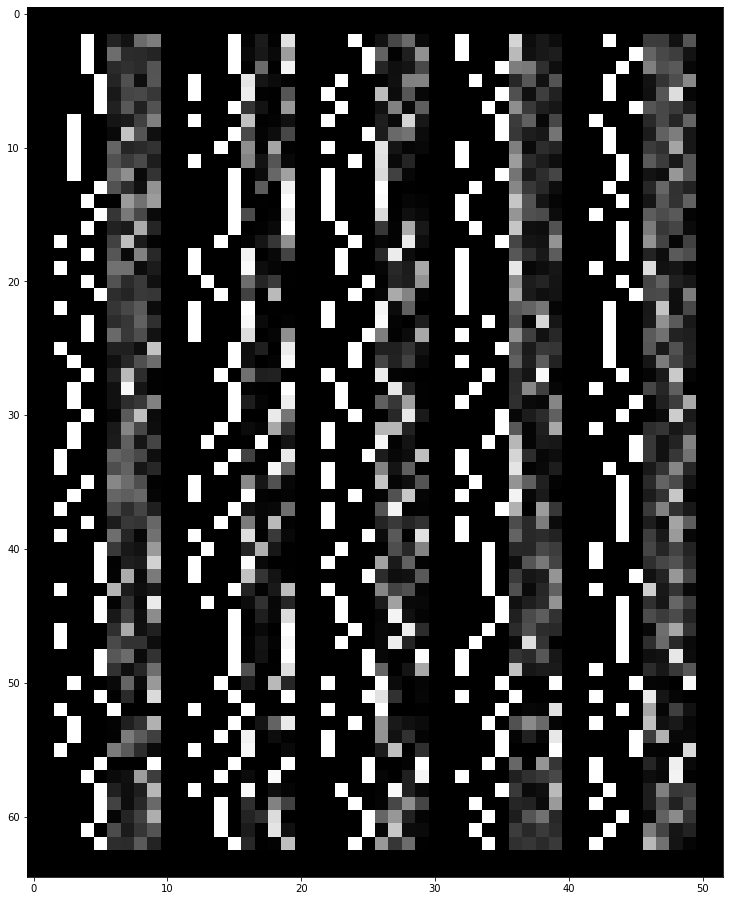

Epoch[855/1000], Step [10/563], Reconst Loss: 648.7107, KL Div: 217.1252
Epoch[855/1000], Step [20/563], Reconst Loss: 695.9968, KL Div: 210.7604
Epoch[855/1000], Step [30/563], Reconst Loss: 539.9865, KL Div: 229.2894
Epoch[855/1000], Step [40/563], Reconst Loss: 709.8303, KL Div: 204.9430
Epoch[855/1000], Step [50/563], Reconst Loss: 743.8823, KL Div: 204.4126
Epoch[855/1000], Step [60/563], Reconst Loss: 569.8436, KL Div: 213.3393
Epoch[855/1000], Step [70/563], Reconst Loss: 657.3220, KL Div: 206.7773
Epoch[855/1000], Step [80/563], Reconst Loss: 667.8479, KL Div: 199.4181
Epoch[855/1000], Step [90/563], Reconst Loss: 672.5834, KL Div: 215.5323
Epoch[855/1000], Step [100/563], Reconst Loss: 723.3658, KL Div: 202.2338
Epoch[855/1000], Step [110/563], Reconst Loss: 650.1848, KL Div: 207.8321
Epoch[855/1000], Step [120/563], Reconst Loss: 738.1357, KL Div: 198.1954
Epoch[855/1000], Step [130/563], Reconst Loss: 732.5507, KL Div: 202.5821
Epoch[855/1000], Step [140/563], Reconst Loss: 

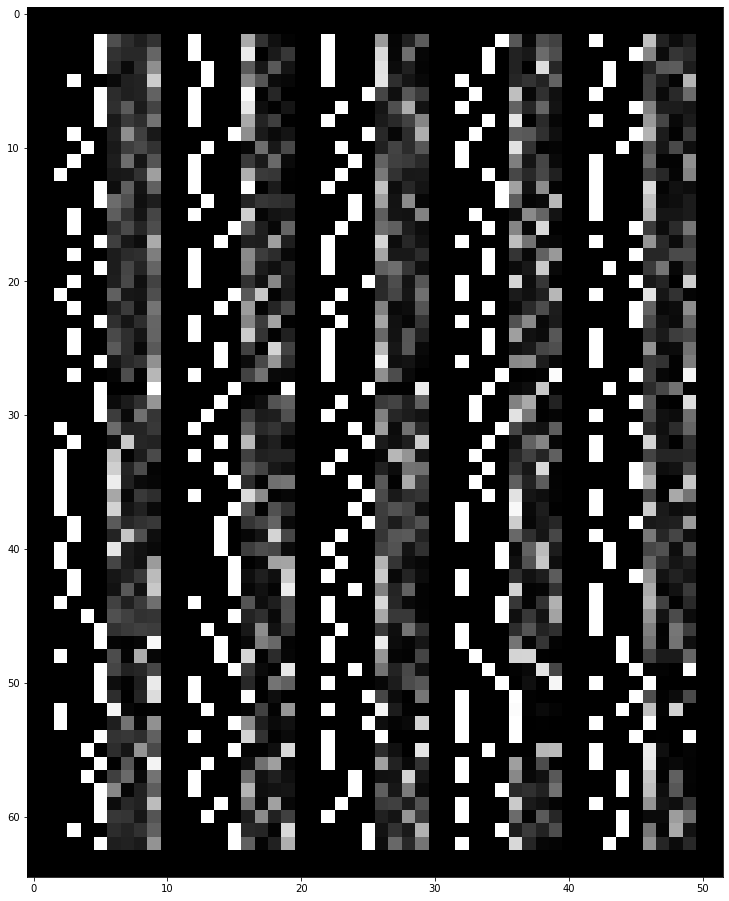

Epoch[856/1000], Step [10/563], Reconst Loss: 656.5002, KL Div: 215.8415
Epoch[856/1000], Step [20/563], Reconst Loss: 683.9745, KL Div: 208.7430
Epoch[856/1000], Step [30/563], Reconst Loss: 736.2152, KL Div: 204.8986
Epoch[856/1000], Step [40/563], Reconst Loss: 734.4397, KL Div: 210.4624
Epoch[856/1000], Step [50/563], Reconst Loss: 626.8329, KL Div: 219.3227
Epoch[856/1000], Step [60/563], Reconst Loss: 670.9631, KL Div: 209.3652
Epoch[856/1000], Step [70/563], Reconst Loss: 661.8008, KL Div: 221.3519
Epoch[856/1000], Step [80/563], Reconst Loss: 591.7706, KL Div: 233.1449
Epoch[856/1000], Step [90/563], Reconst Loss: 686.6686, KL Div: 211.1993
Epoch[856/1000], Step [100/563], Reconst Loss: 686.2521, KL Div: 218.3205
Epoch[856/1000], Step [110/563], Reconst Loss: 595.2744, KL Div: 230.9919
Epoch[856/1000], Step [120/563], Reconst Loss: 763.2418, KL Div: 191.5664
Epoch[856/1000], Step [130/563], Reconst Loss: 621.1785, KL Div: 209.8820
Epoch[856/1000], Step [140/563], Reconst Loss: 

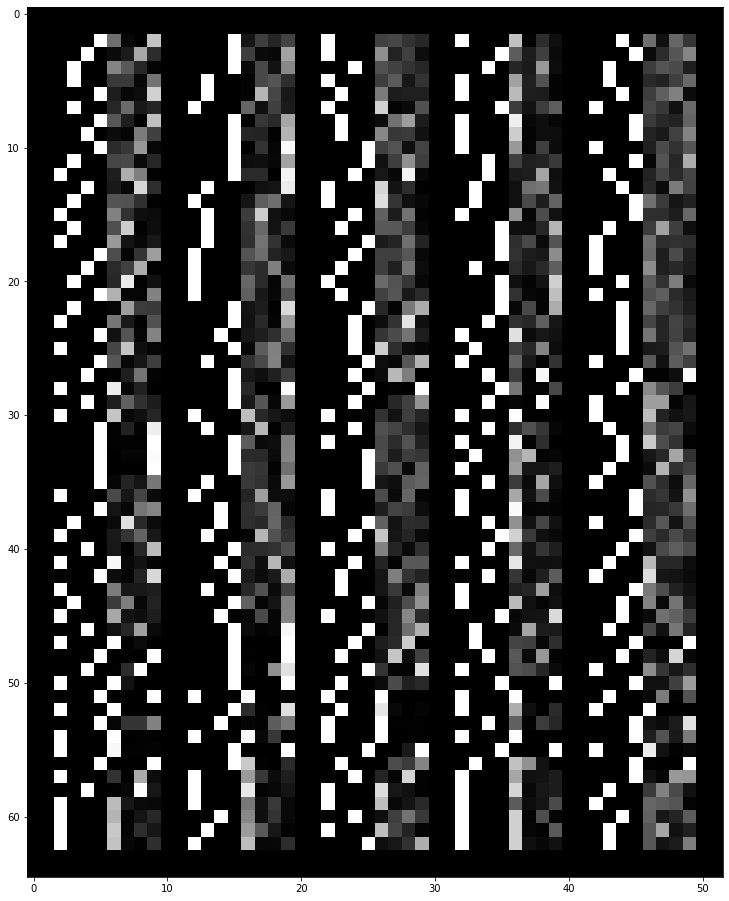

Epoch[857/1000], Step [10/563], Reconst Loss: 581.1354, KL Div: 225.8822
Epoch[857/1000], Step [20/563], Reconst Loss: 678.7122, KL Div: 208.2439
Epoch[857/1000], Step [30/563], Reconst Loss: 662.2539, KL Div: 223.8639
Epoch[857/1000], Step [40/563], Reconst Loss: 696.3043, KL Div: 209.2805
Epoch[857/1000], Step [50/563], Reconst Loss: 707.6816, KL Div: 207.4568
Epoch[857/1000], Step [60/563], Reconst Loss: 737.9073, KL Div: 204.4963
Epoch[857/1000], Step [70/563], Reconst Loss: 697.6424, KL Div: 198.8006
Epoch[857/1000], Step [80/563], Reconst Loss: 572.0737, KL Div: 226.6764
Epoch[857/1000], Step [90/563], Reconst Loss: 668.0541, KL Div: 201.0327
Epoch[857/1000], Step [100/563], Reconst Loss: 756.0657, KL Div: 201.0965
Epoch[857/1000], Step [110/563], Reconst Loss: 662.6568, KL Div: 212.5492
Epoch[857/1000], Step [120/563], Reconst Loss: 658.1837, KL Div: 220.2354
Epoch[857/1000], Step [130/563], Reconst Loss: 593.4579, KL Div: 223.4704
Epoch[857/1000], Step [140/563], Reconst Loss: 

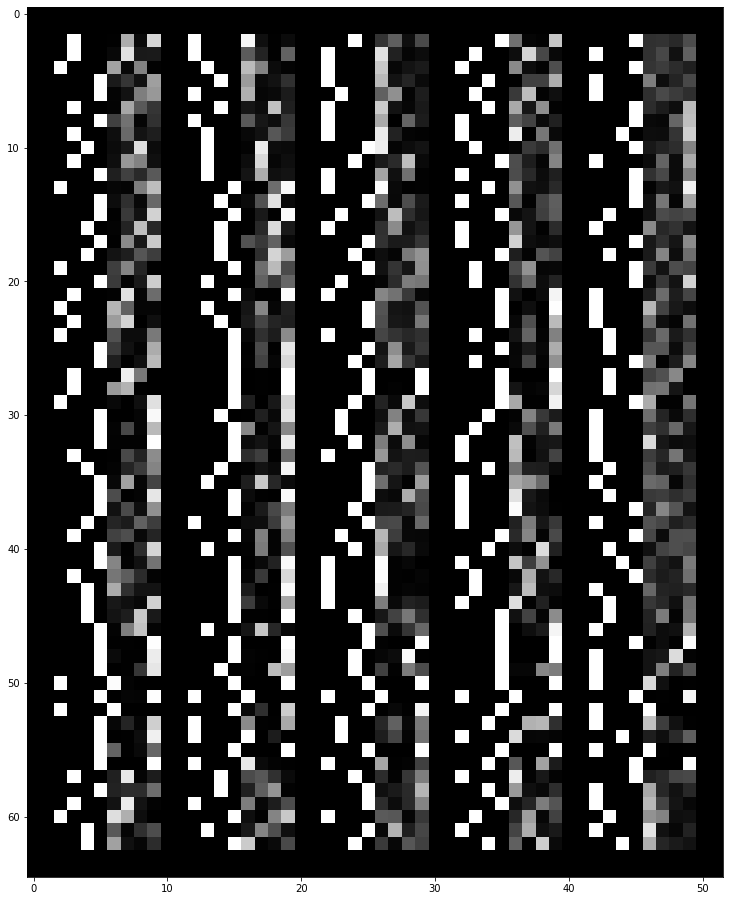

Epoch[858/1000], Step [10/563], Reconst Loss: 742.3834, KL Div: 200.3394
Epoch[858/1000], Step [20/563], Reconst Loss: 705.9692, KL Div: 207.0122
Epoch[858/1000], Step [30/563], Reconst Loss: 651.5231, KL Div: 218.7966
Epoch[858/1000], Step [40/563], Reconst Loss: 732.2759, KL Div: 198.0786
Epoch[858/1000], Step [50/563], Reconst Loss: 579.2870, KL Div: 226.6370
Epoch[858/1000], Step [60/563], Reconst Loss: 754.4562, KL Div: 189.1445
Epoch[858/1000], Step [70/563], Reconst Loss: 578.7503, KL Div: 220.1757
Epoch[858/1000], Step [80/563], Reconst Loss: 629.6447, KL Div: 223.4067
Epoch[858/1000], Step [90/563], Reconst Loss: 654.7374, KL Div: 214.3233
Epoch[858/1000], Step [100/563], Reconst Loss: 628.1951, KL Div: 222.2917
Epoch[858/1000], Step [110/563], Reconst Loss: 757.2813, KL Div: 194.0523
Epoch[858/1000], Step [120/563], Reconst Loss: 700.3270, KL Div: 205.8404
Epoch[858/1000], Step [130/563], Reconst Loss: 660.8303, KL Div: 211.8241
Epoch[858/1000], Step [140/563], Reconst Loss: 

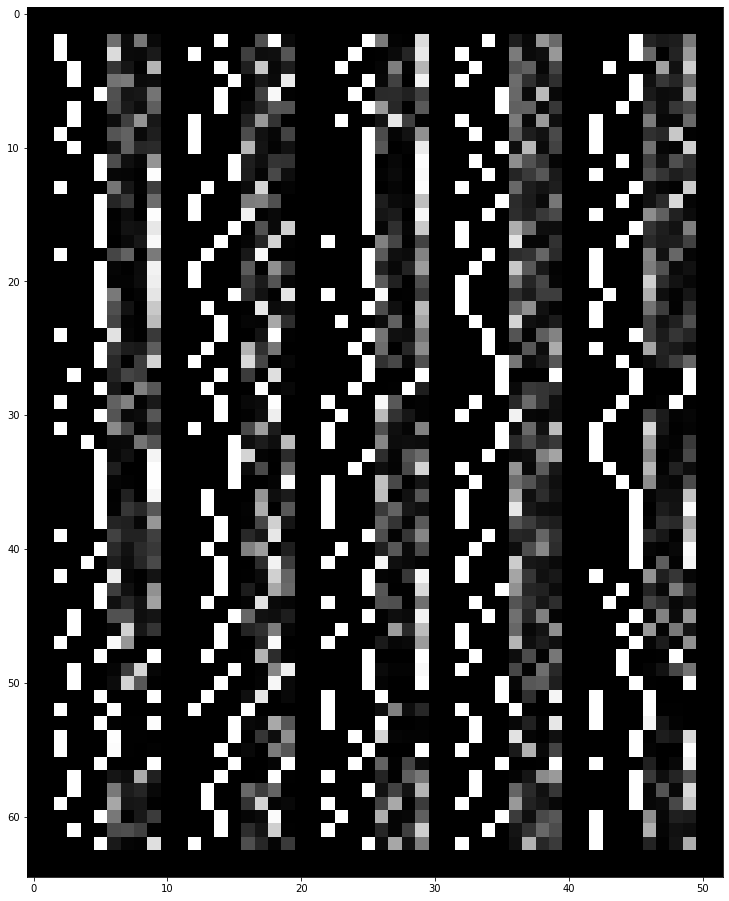

Epoch[859/1000], Step [10/563], Reconst Loss: 708.5122, KL Div: 194.1130
Epoch[859/1000], Step [20/563], Reconst Loss: 788.4680, KL Div: 189.7428
Epoch[859/1000], Step [30/563], Reconst Loss: 722.5126, KL Div: 201.0853
Epoch[859/1000], Step [40/563], Reconst Loss: 764.7038, KL Div: 195.0966
Epoch[859/1000], Step [50/563], Reconst Loss: 683.2152, KL Div: 213.9353
Epoch[859/1000], Step [60/563], Reconst Loss: 682.0739, KL Div: 198.9645
Epoch[859/1000], Step [70/563], Reconst Loss: 594.6186, KL Div: 234.8719
Epoch[859/1000], Step [80/563], Reconst Loss: 596.6910, KL Div: 222.6913
Epoch[859/1000], Step [90/563], Reconst Loss: 693.3513, KL Div: 199.1465
Epoch[859/1000], Step [100/563], Reconst Loss: 635.0796, KL Div: 201.8753
Epoch[859/1000], Step [110/563], Reconst Loss: 700.5515, KL Div: 199.7488
Epoch[859/1000], Step [120/563], Reconst Loss: 690.1045, KL Div: 204.8005
Epoch[859/1000], Step [130/563], Reconst Loss: 513.8282, KL Div: 239.5643
Epoch[859/1000], Step [140/563], Reconst Loss: 

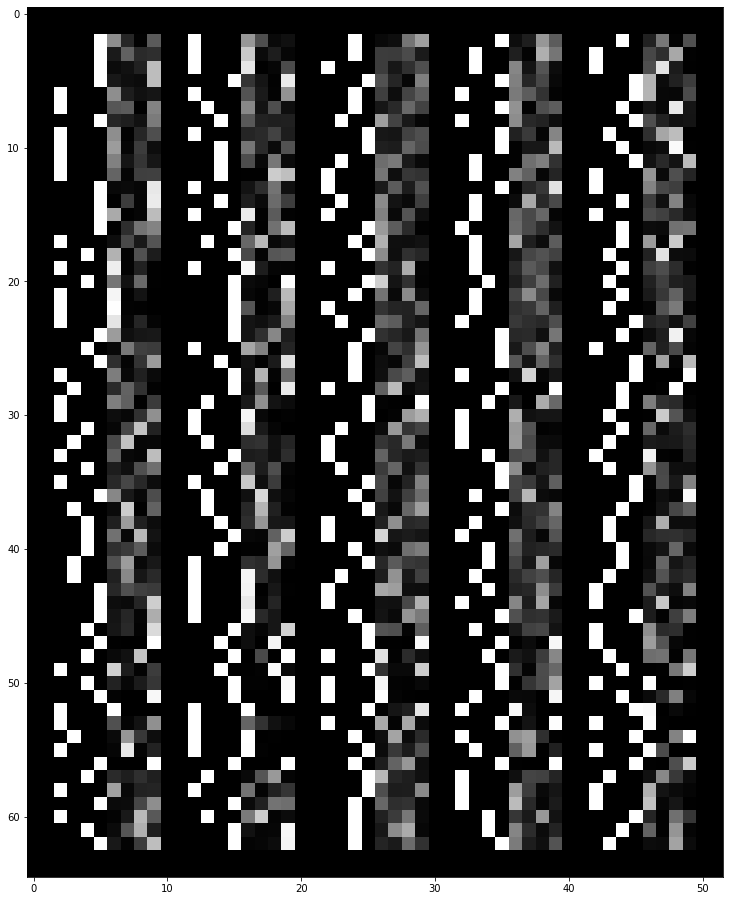

Epoch[860/1000], Step [10/563], Reconst Loss: 725.1814, KL Div: 198.6822
Epoch[860/1000], Step [20/563], Reconst Loss: 715.5032, KL Div: 198.5393
Epoch[860/1000], Step [30/563], Reconst Loss: 648.1139, KL Div: 212.4690
Epoch[860/1000], Step [40/563], Reconst Loss: 702.4445, KL Div: 192.1921
Epoch[860/1000], Step [50/563], Reconst Loss: 759.5387, KL Div: 190.7271
Epoch[860/1000], Step [60/563], Reconst Loss: 674.2426, KL Div: 219.8636
Epoch[860/1000], Step [70/563], Reconst Loss: 705.1293, KL Div: 202.9000
Epoch[860/1000], Step [80/563], Reconst Loss: 637.6906, KL Div: 213.4021
Epoch[860/1000], Step [90/563], Reconst Loss: 672.8083, KL Div: 224.1920
Epoch[860/1000], Step [100/563], Reconst Loss: 653.2185, KL Div: 220.3082
Epoch[860/1000], Step [110/563], Reconst Loss: 618.9214, KL Div: 228.1942
Epoch[860/1000], Step [120/563], Reconst Loss: 612.2089, KL Div: 214.8281
Epoch[860/1000], Step [130/563], Reconst Loss: 720.9110, KL Div: 203.7904
Epoch[860/1000], Step [140/563], Reconst Loss: 

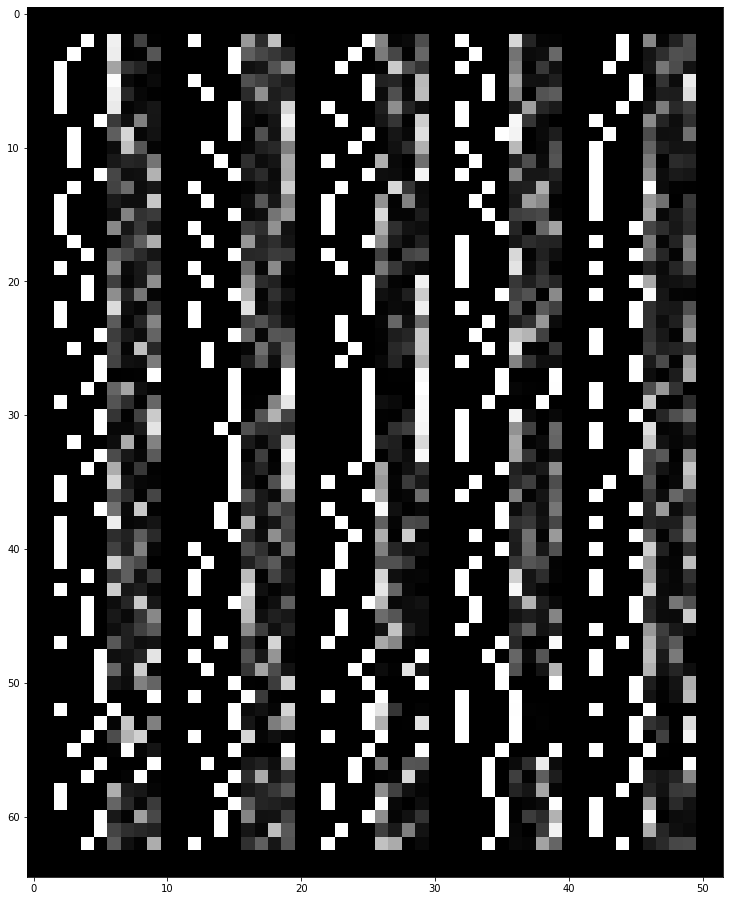

Epoch[861/1000], Step [10/563], Reconst Loss: 691.5463, KL Div: 205.2176
Epoch[861/1000], Step [20/563], Reconst Loss: 736.1536, KL Div: 188.9423
Epoch[861/1000], Step [30/563], Reconst Loss: 670.3464, KL Div: 214.3268
Epoch[861/1000], Step [40/563], Reconst Loss: 709.7886, KL Div: 203.7327
Epoch[861/1000], Step [50/563], Reconst Loss: 524.9515, KL Div: 224.7680
Epoch[861/1000], Step [60/563], Reconst Loss: 747.9780, KL Div: 186.4749
Epoch[861/1000], Step [70/563], Reconst Loss: 641.3400, KL Div: 209.5645
Epoch[861/1000], Step [80/563], Reconst Loss: 658.0654, KL Div: 210.4483
Epoch[861/1000], Step [90/563], Reconst Loss: 672.9319, KL Div: 211.7524
Epoch[861/1000], Step [100/563], Reconst Loss: 595.7381, KL Div: 226.9469
Epoch[861/1000], Step [110/563], Reconst Loss: 701.4733, KL Div: 207.5754
Epoch[861/1000], Step [120/563], Reconst Loss: 582.4447, KL Div: 231.2491
Epoch[861/1000], Step [130/563], Reconst Loss: 696.9547, KL Div: 202.3499
Epoch[861/1000], Step [140/563], Reconst Loss: 

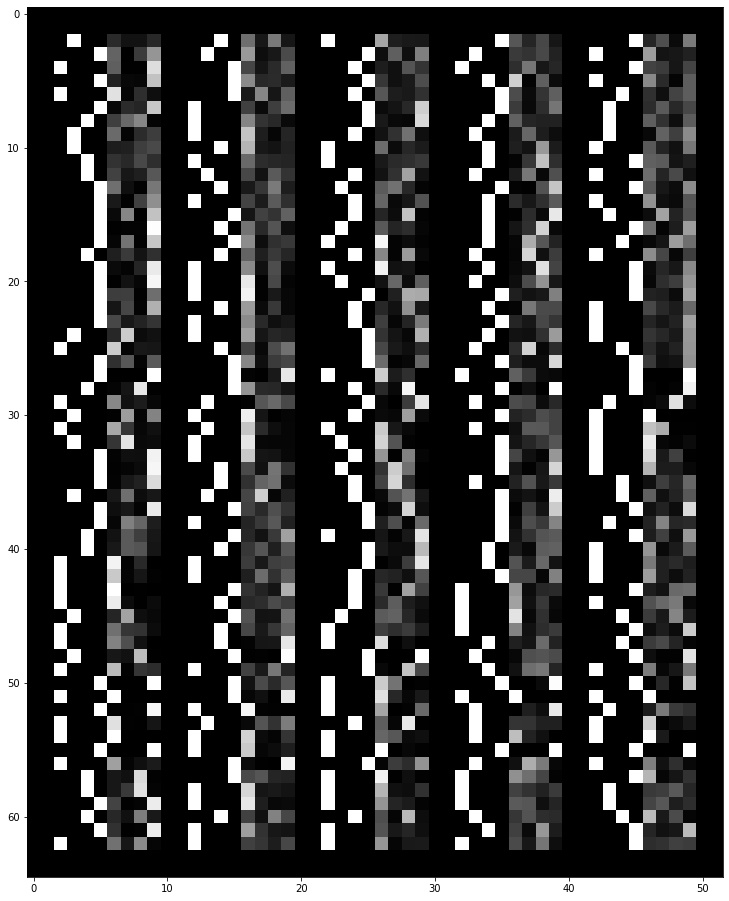

Epoch[862/1000], Step [10/563], Reconst Loss: 648.7117, KL Div: 225.6211
Epoch[862/1000], Step [20/563], Reconst Loss: 633.7780, KL Div: 210.7612
Epoch[862/1000], Step [30/563], Reconst Loss: 562.9199, KL Div: 228.8634
Epoch[862/1000], Step [40/563], Reconst Loss: 684.4374, KL Div: 207.7278
Epoch[862/1000], Step [50/563], Reconst Loss: 655.3124, KL Div: 211.4284
Epoch[862/1000], Step [60/563], Reconst Loss: 623.2534, KL Div: 218.5053
Epoch[862/1000], Step [70/563], Reconst Loss: 677.2863, KL Div: 214.7469
Epoch[862/1000], Step [80/563], Reconst Loss: 635.3301, KL Div: 218.6911
Epoch[862/1000], Step [90/563], Reconst Loss: 658.0164, KL Div: 204.7460
Epoch[862/1000], Step [100/563], Reconst Loss: 571.4016, KL Div: 232.4493
Epoch[862/1000], Step [110/563], Reconst Loss: 784.2633, KL Div: 195.3331
Epoch[862/1000], Step [120/563], Reconst Loss: 624.5640, KL Div: 228.0161
Epoch[862/1000], Step [130/563], Reconst Loss: 662.0258, KL Div: 213.1110
Epoch[862/1000], Step [140/563], Reconst Loss: 

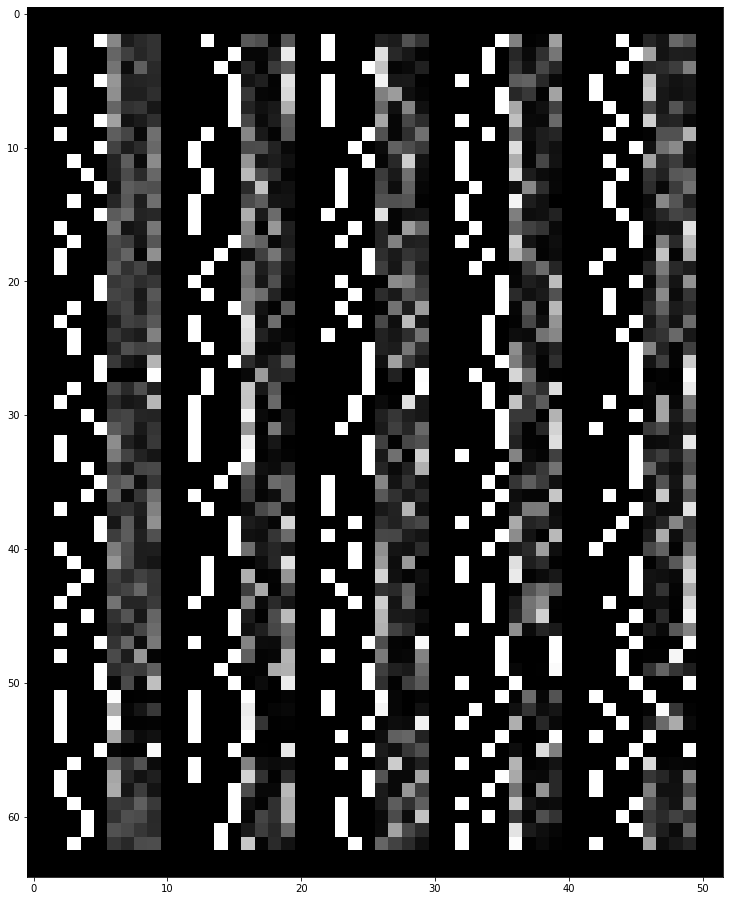

Epoch[863/1000], Step [10/563], Reconst Loss: 683.6029, KL Div: 207.1115
Epoch[863/1000], Step [20/563], Reconst Loss: 607.3500, KL Div: 219.3034
Epoch[863/1000], Step [30/563], Reconst Loss: 580.0836, KL Div: 225.3853
Epoch[863/1000], Step [40/563], Reconst Loss: 643.1658, KL Div: 220.9481
Epoch[863/1000], Step [50/563], Reconst Loss: 646.0748, KL Div: 217.5800
Epoch[863/1000], Step [60/563], Reconst Loss: 679.8594, KL Div: 196.9659
Epoch[863/1000], Step [70/563], Reconst Loss: 731.4675, KL Div: 202.3569
Epoch[863/1000], Step [80/563], Reconst Loss: 646.9146, KL Div: 217.3370
Epoch[863/1000], Step [90/563], Reconst Loss: 715.1378, KL Div: 211.0609
Epoch[863/1000], Step [100/563], Reconst Loss: 706.2294, KL Div: 207.8064
Epoch[863/1000], Step [110/563], Reconst Loss: 655.3082, KL Div: 213.6747
Epoch[863/1000], Step [120/563], Reconst Loss: 647.0743, KL Div: 207.2261
Epoch[863/1000], Step [130/563], Reconst Loss: 664.8192, KL Div: 212.2265
Epoch[863/1000], Step [140/563], Reconst Loss: 

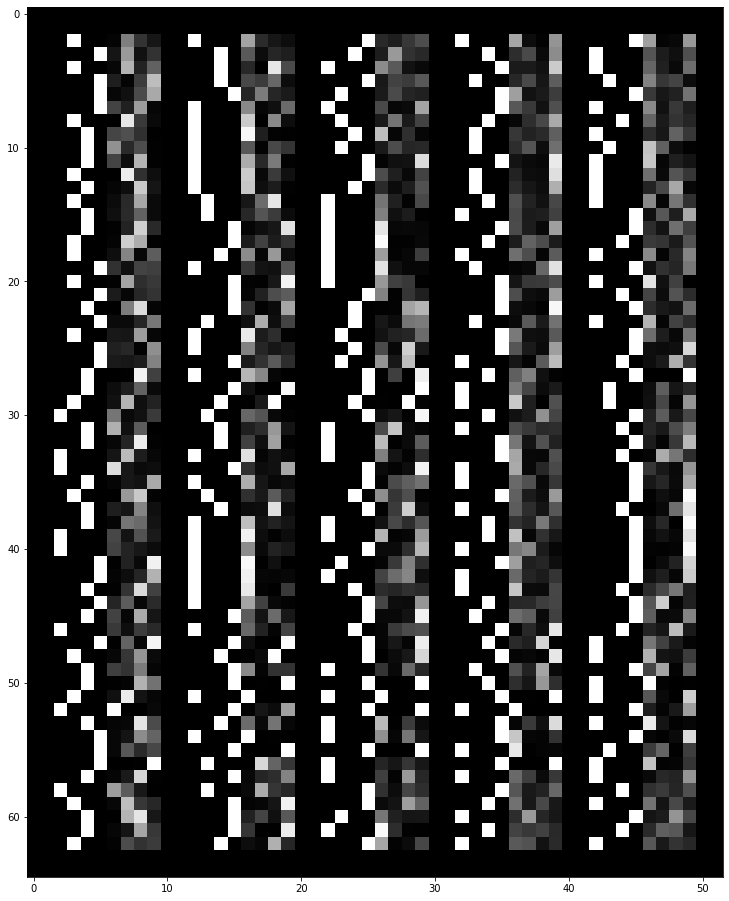

Epoch[864/1000], Step [10/563], Reconst Loss: 646.9083, KL Div: 227.1387
Epoch[864/1000], Step [20/563], Reconst Loss: 603.7889, KL Div: 223.8535
Epoch[864/1000], Step [30/563], Reconst Loss: 681.5959, KL Div: 203.5565
Epoch[864/1000], Step [40/563], Reconst Loss: 689.1268, KL Div: 215.2022
Epoch[864/1000], Step [50/563], Reconst Loss: 606.9304, KL Div: 217.3387
Epoch[864/1000], Step [60/563], Reconst Loss: 619.4329, KL Div: 218.5900
Epoch[864/1000], Step [70/563], Reconst Loss: 660.0627, KL Div: 214.8163
Epoch[864/1000], Step [80/563], Reconst Loss: 635.6515, KL Div: 218.7365
Epoch[864/1000], Step [90/563], Reconst Loss: 611.3328, KL Div: 225.1245
Epoch[864/1000], Step [100/563], Reconst Loss: 728.2205, KL Div: 193.7390
Epoch[864/1000], Step [110/563], Reconst Loss: 638.1722, KL Div: 229.0593
Epoch[864/1000], Step [120/563], Reconst Loss: 772.7465, KL Div: 181.9691
Epoch[864/1000], Step [130/563], Reconst Loss: 710.1406, KL Div: 209.1733
Epoch[864/1000], Step [140/563], Reconst Loss: 

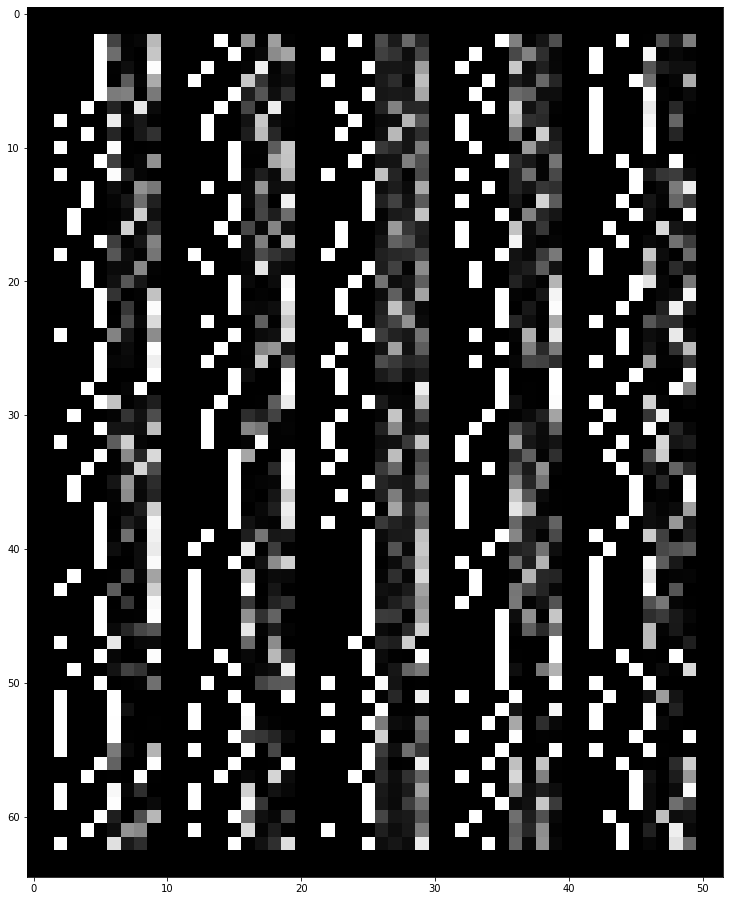

Epoch[865/1000], Step [10/563], Reconst Loss: 601.6278, KL Div: 216.7277
Epoch[865/1000], Step [20/563], Reconst Loss: 684.8876, KL Div: 203.3747
Epoch[865/1000], Step [30/563], Reconst Loss: 604.1278, KL Div: 237.8793
Epoch[865/1000], Step [40/563], Reconst Loss: 751.7905, KL Div: 199.6426
Epoch[865/1000], Step [50/563], Reconst Loss: 600.1455, KL Div: 226.1517
Epoch[865/1000], Step [60/563], Reconst Loss: 745.5602, KL Div: 192.6340
Epoch[865/1000], Step [70/563], Reconst Loss: 605.0638, KL Div: 218.7070
Epoch[865/1000], Step [80/563], Reconst Loss: 641.0128, KL Div: 220.1612
Epoch[865/1000], Step [90/563], Reconst Loss: 720.7108, KL Div: 201.3898
Epoch[865/1000], Step [100/563], Reconst Loss: 657.6296, KL Div: 216.3186
Epoch[865/1000], Step [110/563], Reconst Loss: 664.1621, KL Div: 206.1041
Epoch[865/1000], Step [120/563], Reconst Loss: 676.4030, KL Div: 215.1750
Epoch[865/1000], Step [130/563], Reconst Loss: 724.6852, KL Div: 212.9113
Epoch[865/1000], Step [140/563], Reconst Loss: 

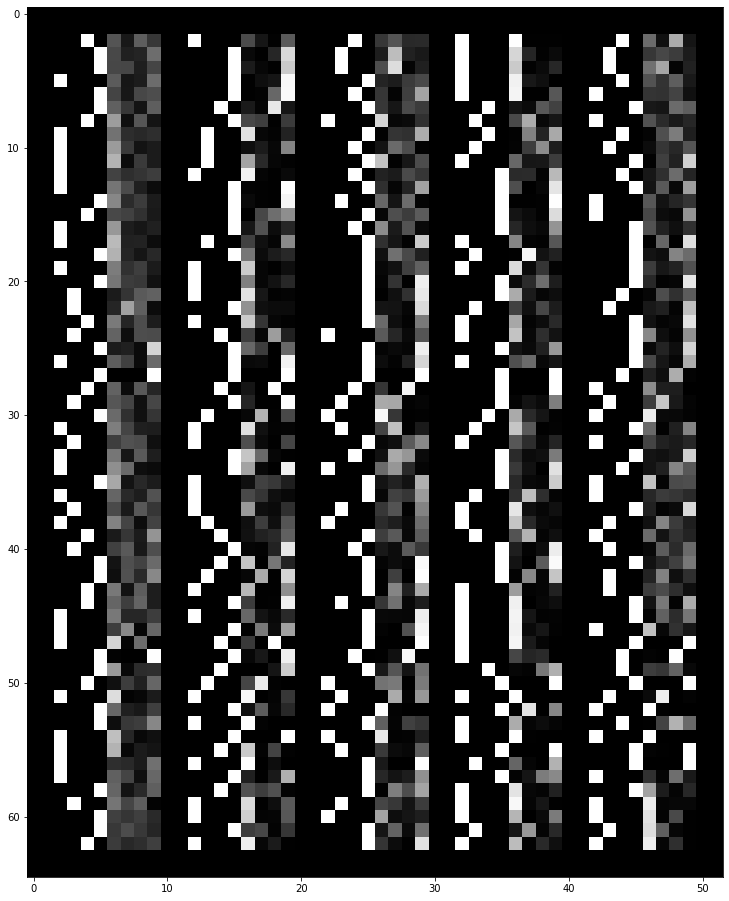

Epoch[866/1000], Step [10/563], Reconst Loss: 743.0800, KL Div: 190.1382
Epoch[866/1000], Step [20/563], Reconst Loss: 698.2683, KL Div: 207.8520
Epoch[866/1000], Step [30/563], Reconst Loss: 729.6166, KL Div: 185.2907
Epoch[866/1000], Step [40/563], Reconst Loss: 632.5483, KL Div: 216.1752
Epoch[866/1000], Step [50/563], Reconst Loss: 752.7164, KL Div: 184.0742
Epoch[866/1000], Step [60/563], Reconst Loss: 624.5112, KL Div: 217.9576
Epoch[866/1000], Step [70/563], Reconst Loss: 630.0269, KL Div: 211.2059
Epoch[866/1000], Step [80/563], Reconst Loss: 713.2695, KL Div: 199.7643
Epoch[866/1000], Step [90/563], Reconst Loss: 654.3163, KL Div: 213.8642
Epoch[866/1000], Step [100/563], Reconst Loss: 657.8192, KL Div: 217.1448
Epoch[866/1000], Step [110/563], Reconst Loss: 732.4890, KL Div: 199.6413
Epoch[866/1000], Step [120/563], Reconst Loss: 716.0110, KL Div: 208.4098
Epoch[866/1000], Step [130/563], Reconst Loss: 650.2566, KL Div: 210.2285
Epoch[866/1000], Step [140/563], Reconst Loss: 

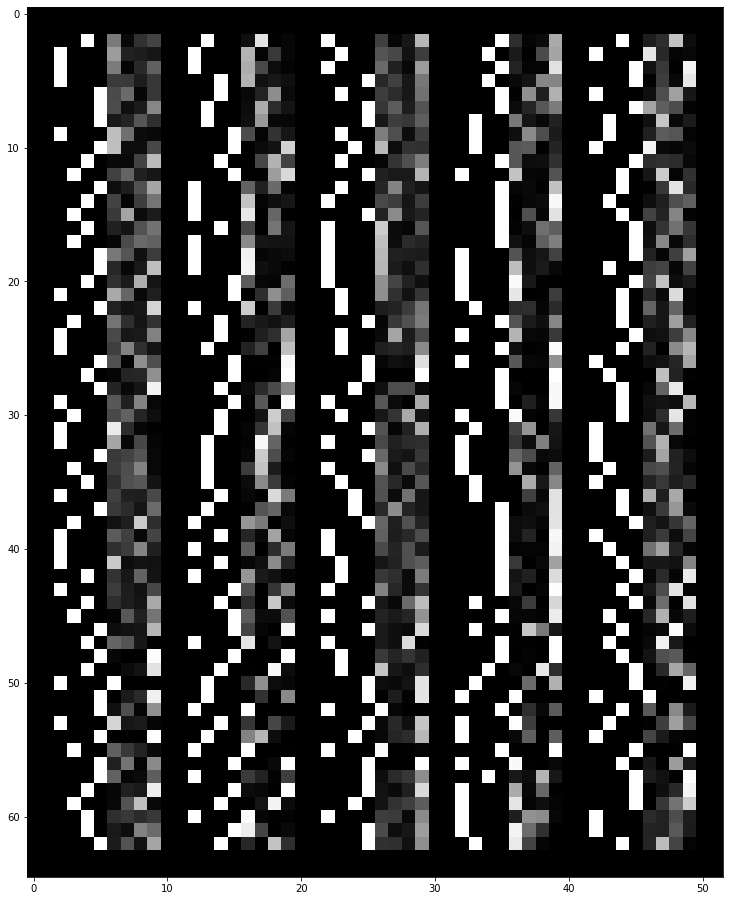

Epoch[867/1000], Step [10/563], Reconst Loss: 639.9623, KL Div: 213.0943
Epoch[867/1000], Step [20/563], Reconst Loss: 763.0388, KL Div: 192.6539
Epoch[867/1000], Step [30/563], Reconst Loss: 634.9579, KL Div: 213.2510
Epoch[867/1000], Step [40/563], Reconst Loss: 628.5494, KL Div: 204.2151
Epoch[867/1000], Step [50/563], Reconst Loss: 609.2173, KL Div: 228.0430
Epoch[867/1000], Step [60/563], Reconst Loss: 754.5084, KL Div: 196.1339
Epoch[867/1000], Step [70/563], Reconst Loss: 645.6018, KL Div: 219.7265
Epoch[867/1000], Step [80/563], Reconst Loss: 699.2806, KL Div: 205.3941
Epoch[867/1000], Step [90/563], Reconst Loss: 759.8623, KL Div: 189.6126
Epoch[867/1000], Step [100/563], Reconst Loss: 748.8223, KL Div: 187.5666
Epoch[867/1000], Step [110/563], Reconst Loss: 702.2905, KL Div: 199.9385
Epoch[867/1000], Step [120/563], Reconst Loss: 692.1537, KL Div: 197.8645
Epoch[867/1000], Step [130/563], Reconst Loss: 648.8956, KL Div: 200.1449
Epoch[867/1000], Step [140/563], Reconst Loss: 

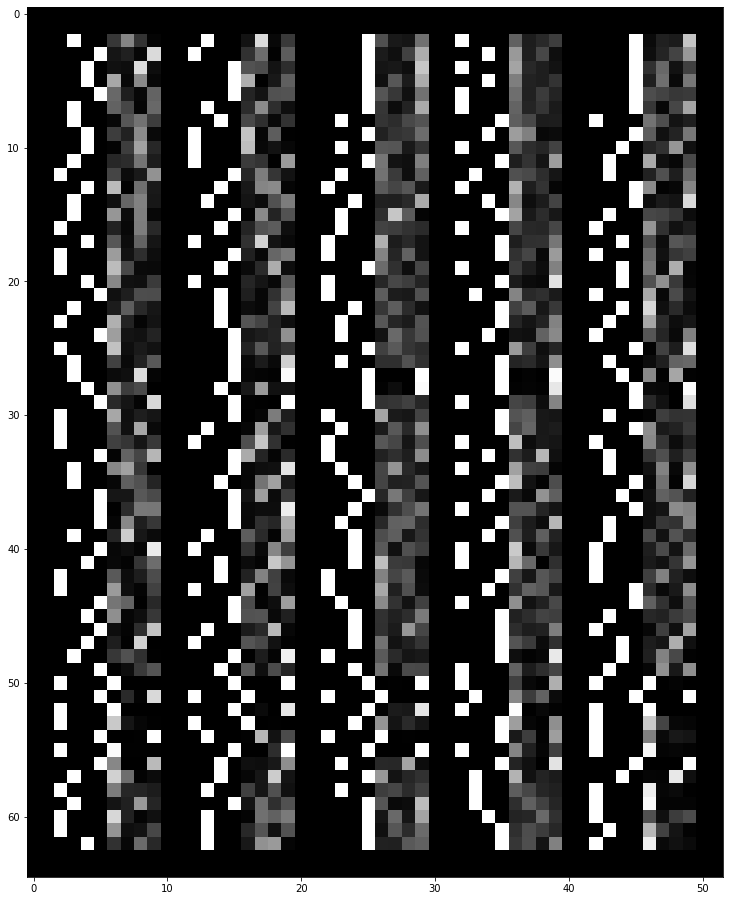

Epoch[868/1000], Step [10/563], Reconst Loss: 592.8424, KL Div: 218.0765
Epoch[868/1000], Step [20/563], Reconst Loss: 661.7474, KL Div: 212.8681
Epoch[868/1000], Step [30/563], Reconst Loss: 745.4403, KL Div: 205.6758
Epoch[868/1000], Step [40/563], Reconst Loss: 758.5480, KL Div: 197.7663
Epoch[868/1000], Step [50/563], Reconst Loss: 609.3700, KL Div: 213.4356
Epoch[868/1000], Step [60/563], Reconst Loss: 553.0652, KL Div: 241.0252
Epoch[868/1000], Step [70/563], Reconst Loss: 637.2262, KL Div: 216.6786
Epoch[868/1000], Step [80/563], Reconst Loss: 746.0197, KL Div: 192.5396
Epoch[868/1000], Step [90/563], Reconst Loss: 772.8458, KL Div: 196.2766
Epoch[868/1000], Step [100/563], Reconst Loss: 663.9666, KL Div: 216.3639
Epoch[868/1000], Step [110/563], Reconst Loss: 690.5228, KL Div: 195.8889
Epoch[868/1000], Step [120/563], Reconst Loss: 704.4187, KL Div: 206.8812
Epoch[868/1000], Step [130/563], Reconst Loss: 667.9980, KL Div: 211.8805
Epoch[868/1000], Step [140/563], Reconst Loss: 

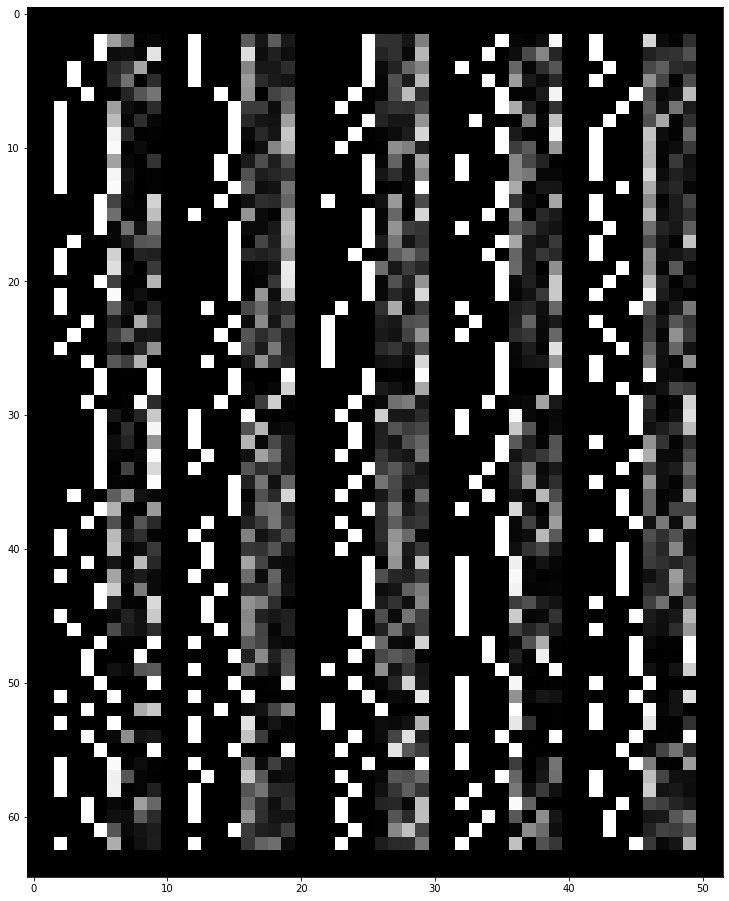

Epoch[869/1000], Step [10/563], Reconst Loss: 671.2090, KL Div: 201.8016
Epoch[869/1000], Step [20/563], Reconst Loss: 661.3765, KL Div: 206.0616
Epoch[869/1000], Step [30/563], Reconst Loss: 672.1456, KL Div: 205.4529
Epoch[869/1000], Step [40/563], Reconst Loss: 736.1685, KL Div: 197.7997
Epoch[869/1000], Step [50/563], Reconst Loss: 646.3585, KL Div: 220.1124
Epoch[869/1000], Step [60/563], Reconst Loss: 740.9705, KL Div: 195.7139
Epoch[869/1000], Step [70/563], Reconst Loss: 695.6864, KL Div: 196.4449
Epoch[869/1000], Step [80/563], Reconst Loss: 732.2021, KL Div: 201.3954
Epoch[869/1000], Step [90/563], Reconst Loss: 647.3374, KL Div: 211.4982
Epoch[869/1000], Step [100/563], Reconst Loss: 722.7346, KL Div: 203.1974
Epoch[869/1000], Step [110/563], Reconst Loss: 689.9473, KL Div: 204.6097
Epoch[869/1000], Step [120/563], Reconst Loss: 574.1036, KL Div: 224.2661
Epoch[869/1000], Step [130/563], Reconst Loss: 656.2202, KL Div: 216.1692
Epoch[869/1000], Step [140/563], Reconst Loss: 

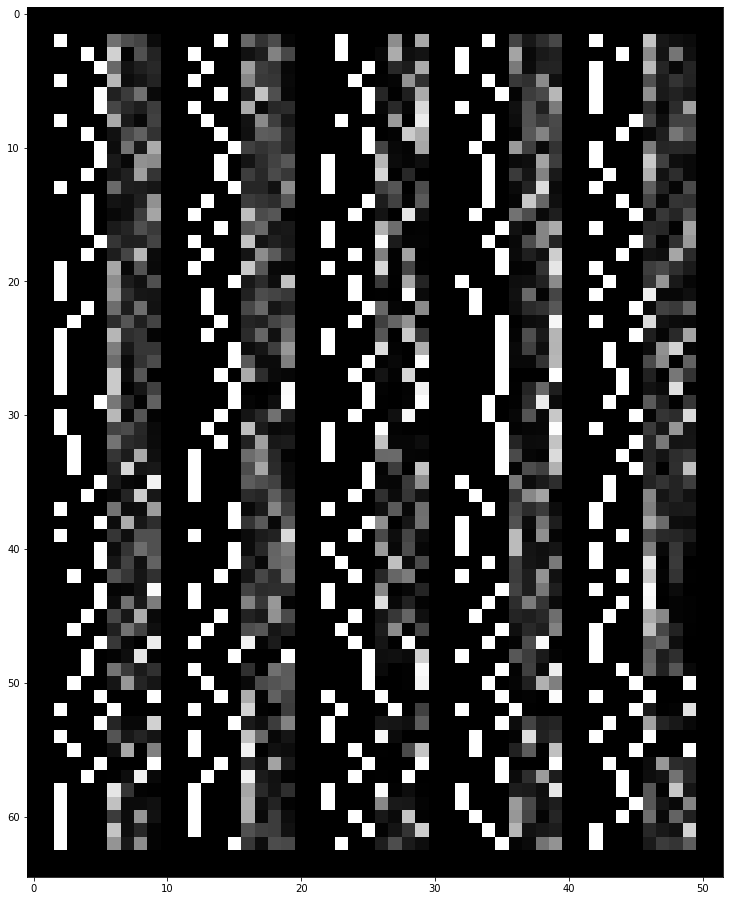

Epoch[870/1000], Step [10/563], Reconst Loss: 681.3679, KL Div: 202.9539
Epoch[870/1000], Step [20/563], Reconst Loss: 733.6818, KL Div: 196.7801
Epoch[870/1000], Step [30/563], Reconst Loss: 631.0361, KL Div: 206.1843
Epoch[870/1000], Step [40/563], Reconst Loss: 705.7738, KL Div: 193.7417
Epoch[870/1000], Step [50/563], Reconst Loss: 737.5314, KL Div: 187.7124
Epoch[870/1000], Step [60/563], Reconst Loss: 649.6693, KL Div: 209.2915
Epoch[870/1000], Step [70/563], Reconst Loss: 641.9658, KL Div: 211.2516
Epoch[870/1000], Step [80/563], Reconst Loss: 558.1027, KL Div: 243.1634
Epoch[870/1000], Step [90/563], Reconst Loss: 688.9650, KL Div: 214.0338
Epoch[870/1000], Step [100/563], Reconst Loss: 680.2985, KL Div: 219.0475
Epoch[870/1000], Step [110/563], Reconst Loss: 669.6823, KL Div: 209.5112
Epoch[870/1000], Step [120/563], Reconst Loss: 720.9547, KL Div: 202.4864
Epoch[870/1000], Step [130/563], Reconst Loss: 720.4090, KL Div: 195.1877
Epoch[870/1000], Step [140/563], Reconst Loss: 

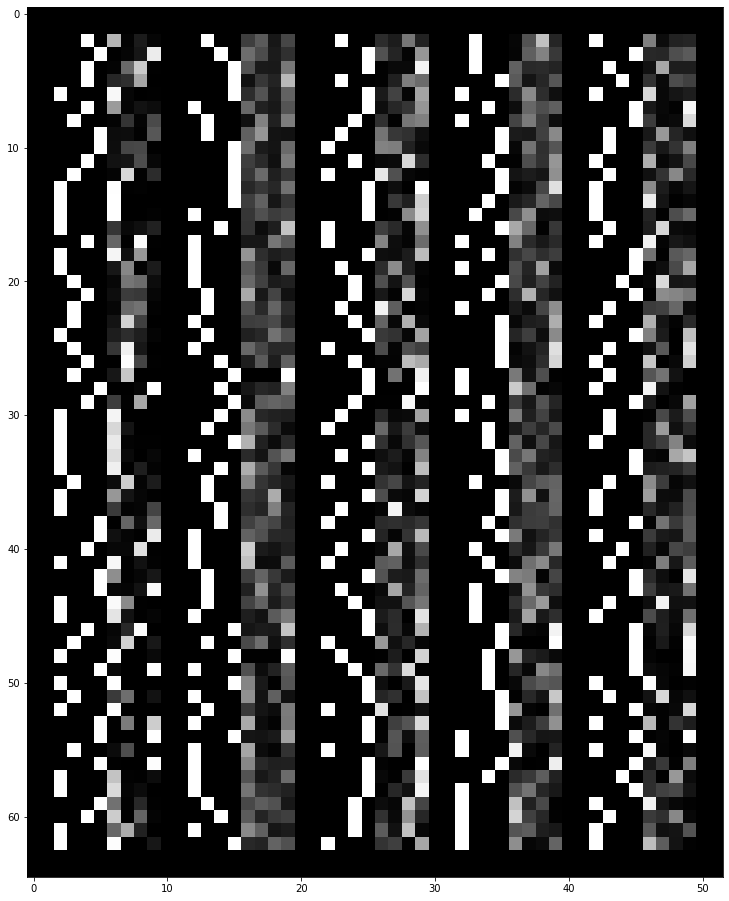

Epoch[871/1000], Step [10/563], Reconst Loss: 678.8428, KL Div: 207.6605
Epoch[871/1000], Step [20/563], Reconst Loss: 711.7798, KL Div: 212.9266
Epoch[871/1000], Step [30/563], Reconst Loss: 730.9333, KL Div: 181.2753
Epoch[871/1000], Step [40/563], Reconst Loss: 721.4495, KL Div: 193.1875
Epoch[871/1000], Step [50/563], Reconst Loss: 614.8971, KL Div: 212.1775
Epoch[871/1000], Step [60/563], Reconst Loss: 640.6000, KL Div: 212.1806
Epoch[871/1000], Step [70/563], Reconst Loss: 674.4872, KL Div: 205.3002
Epoch[871/1000], Step [80/563], Reconst Loss: 682.2704, KL Div: 219.9292
Epoch[871/1000], Step [90/563], Reconst Loss: 740.1721, KL Div: 201.3987
Epoch[871/1000], Step [100/563], Reconst Loss: 715.8331, KL Div: 225.3947
Epoch[871/1000], Step [110/563], Reconst Loss: 559.8019, KL Div: 221.8080
Epoch[871/1000], Step [120/563], Reconst Loss: 642.6650, KL Div: 204.6836
Epoch[871/1000], Step [130/563], Reconst Loss: 584.4654, KL Div: 229.8297
Epoch[871/1000], Step [140/563], Reconst Loss: 

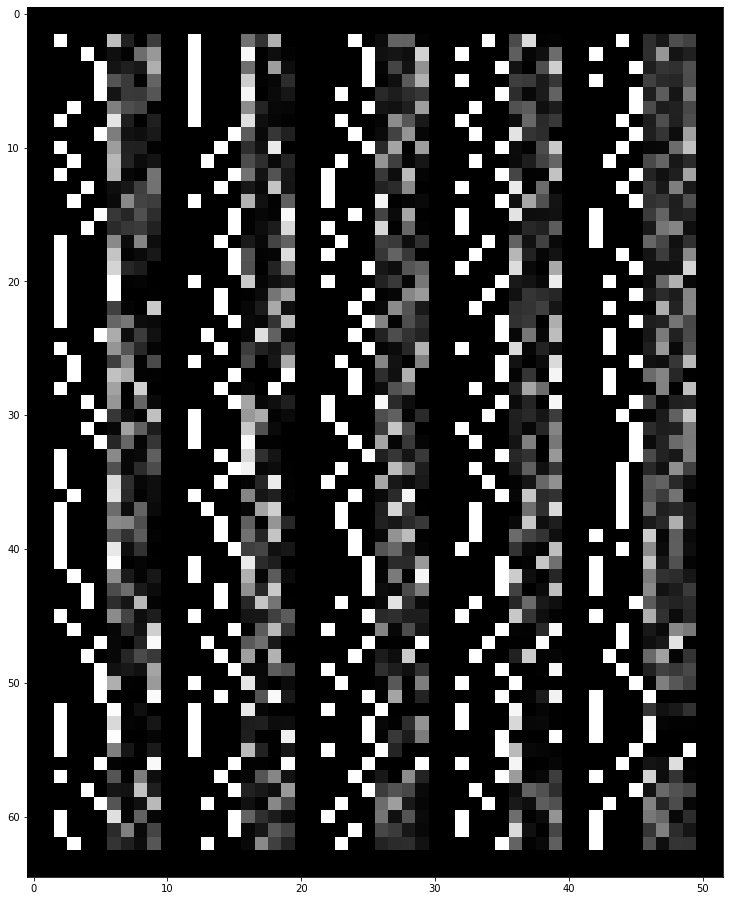

Epoch[872/1000], Step [10/563], Reconst Loss: 700.2627, KL Div: 200.1812
Epoch[872/1000], Step [20/563], Reconst Loss: 630.6760, KL Div: 223.6706
Epoch[872/1000], Step [30/563], Reconst Loss: 591.8416, KL Div: 204.6792
Epoch[872/1000], Step [40/563], Reconst Loss: 729.3068, KL Div: 193.1341
Epoch[872/1000], Step [50/563], Reconst Loss: 620.9741, KL Div: 224.4566
Epoch[872/1000], Step [60/563], Reconst Loss: 701.6241, KL Div: 200.2059
Epoch[872/1000], Step [70/563], Reconst Loss: 713.2308, KL Div: 193.5620
Epoch[872/1000], Step [80/563], Reconst Loss: 607.6224, KL Div: 215.2426
Epoch[872/1000], Step [90/563], Reconst Loss: 660.3880, KL Div: 212.7042
Epoch[872/1000], Step [100/563], Reconst Loss: 789.2734, KL Div: 186.9055
Epoch[872/1000], Step [110/563], Reconst Loss: 815.8605, KL Div: 173.2127
Epoch[872/1000], Step [120/563], Reconst Loss: 632.5106, KL Div: 219.3469
Epoch[872/1000], Step [130/563], Reconst Loss: 642.3384, KL Div: 214.3674
Epoch[872/1000], Step [140/563], Reconst Loss: 

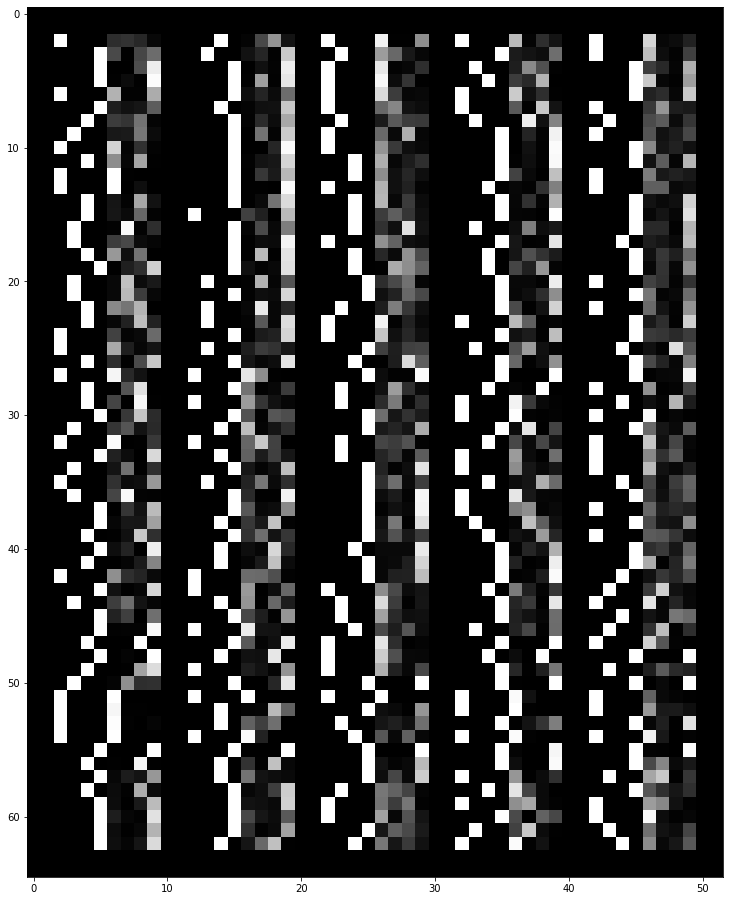

Epoch[873/1000], Step [10/563], Reconst Loss: 680.6536, KL Div: 214.7914
Epoch[873/1000], Step [20/563], Reconst Loss: 680.5885, KL Div: 210.2471
Epoch[873/1000], Step [30/563], Reconst Loss: 709.8766, KL Div: 217.0616
Epoch[873/1000], Step [40/563], Reconst Loss: 719.8098, KL Div: 204.6396
Epoch[873/1000], Step [50/563], Reconst Loss: 712.6775, KL Div: 204.5399
Epoch[873/1000], Step [60/563], Reconst Loss: 745.3248, KL Div: 199.5253
Epoch[873/1000], Step [70/563], Reconst Loss: 639.6104, KL Div: 216.3734
Epoch[873/1000], Step [80/563], Reconst Loss: 706.2800, KL Div: 206.3484
Epoch[873/1000], Step [90/563], Reconst Loss: 762.0093, KL Div: 191.8331
Epoch[873/1000], Step [100/563], Reconst Loss: 678.5739, KL Div: 218.8882
Epoch[873/1000], Step [110/563], Reconst Loss: 777.8528, KL Div: 192.1771
Epoch[873/1000], Step [120/563], Reconst Loss: 593.9305, KL Div: 227.0709
Epoch[873/1000], Step [130/563], Reconst Loss: 607.9417, KL Div: 223.4335
Epoch[873/1000], Step [140/563], Reconst Loss: 

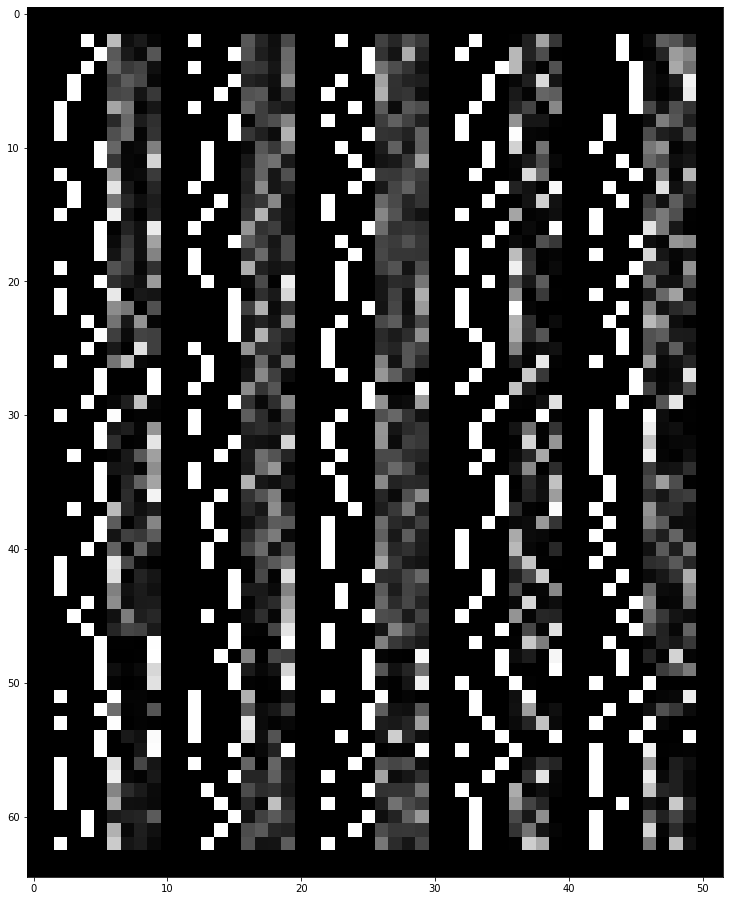

Epoch[874/1000], Step [10/563], Reconst Loss: 691.7723, KL Div: 204.8022
Epoch[874/1000], Step [20/563], Reconst Loss: 642.0039, KL Div: 214.8845
Epoch[874/1000], Step [30/563], Reconst Loss: 598.5231, KL Div: 221.8018
Epoch[874/1000], Step [40/563], Reconst Loss: 561.5266, KL Div: 235.6342
Epoch[874/1000], Step [50/563], Reconst Loss: 750.4431, KL Div: 191.8942
Epoch[874/1000], Step [60/563], Reconst Loss: 728.1528, KL Div: 212.1514
Epoch[874/1000], Step [70/563], Reconst Loss: 696.7501, KL Div: 207.4563
Epoch[874/1000], Step [80/563], Reconst Loss: 724.6124, KL Div: 204.0582
Epoch[874/1000], Step [90/563], Reconst Loss: 694.3367, KL Div: 203.1237
Epoch[874/1000], Step [100/563], Reconst Loss: 644.1090, KL Div: 218.0273
Epoch[874/1000], Step [110/563], Reconst Loss: 639.7081, KL Div: 223.3725
Epoch[874/1000], Step [120/563], Reconst Loss: 742.2797, KL Div: 200.8304
Epoch[874/1000], Step [130/563], Reconst Loss: 660.2490, KL Div: 210.3448
Epoch[874/1000], Step [140/563], Reconst Loss: 

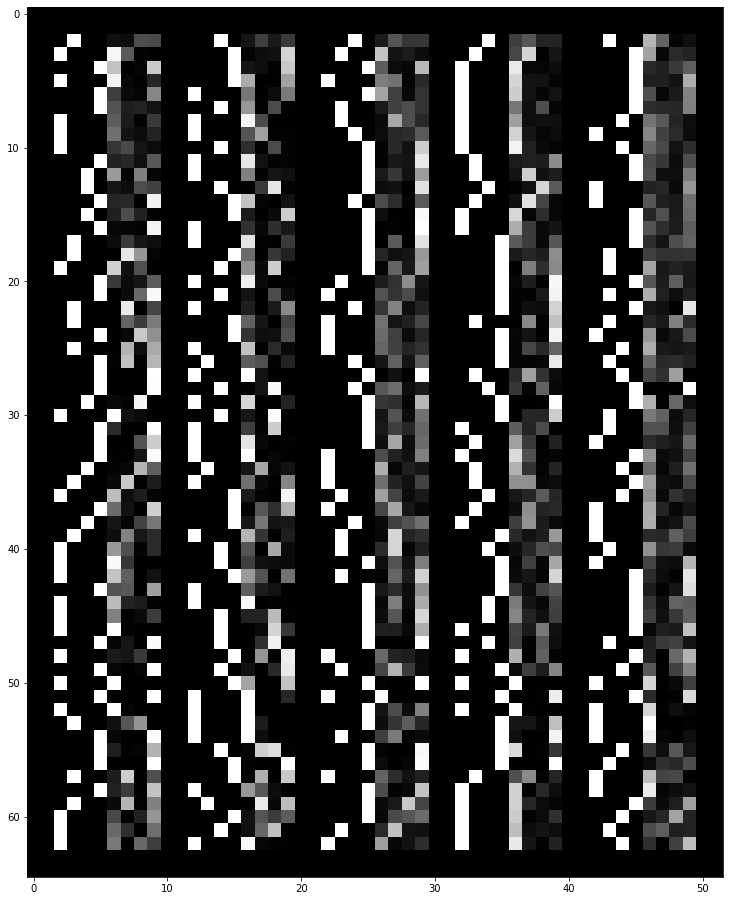

Epoch[875/1000], Step [10/563], Reconst Loss: 686.3280, KL Div: 202.3055
Epoch[875/1000], Step [20/563], Reconst Loss: 644.4198, KL Div: 213.0619
Epoch[875/1000], Step [30/563], Reconst Loss: 741.1273, KL Div: 199.4781
Epoch[875/1000], Step [40/563], Reconst Loss: 602.1848, KL Div: 227.1349
Epoch[875/1000], Step [50/563], Reconst Loss: 751.3434, KL Div: 191.1785
Epoch[875/1000], Step [60/563], Reconst Loss: 680.9661, KL Div: 210.3744
Epoch[875/1000], Step [70/563], Reconst Loss: 584.8624, KL Div: 235.8681
Epoch[875/1000], Step [80/563], Reconst Loss: 677.5466, KL Div: 218.3056
Epoch[875/1000], Step [90/563], Reconst Loss: 631.5283, KL Div: 224.1707
Epoch[875/1000], Step [100/563], Reconst Loss: 545.6738, KL Div: 235.0559
Epoch[875/1000], Step [110/563], Reconst Loss: 640.8275, KL Div: 222.7413
Epoch[875/1000], Step [120/563], Reconst Loss: 698.5153, KL Div: 198.7607
Epoch[875/1000], Step [130/563], Reconst Loss: 664.0536, KL Div: 209.2661
Epoch[875/1000], Step [140/563], Reconst Loss: 

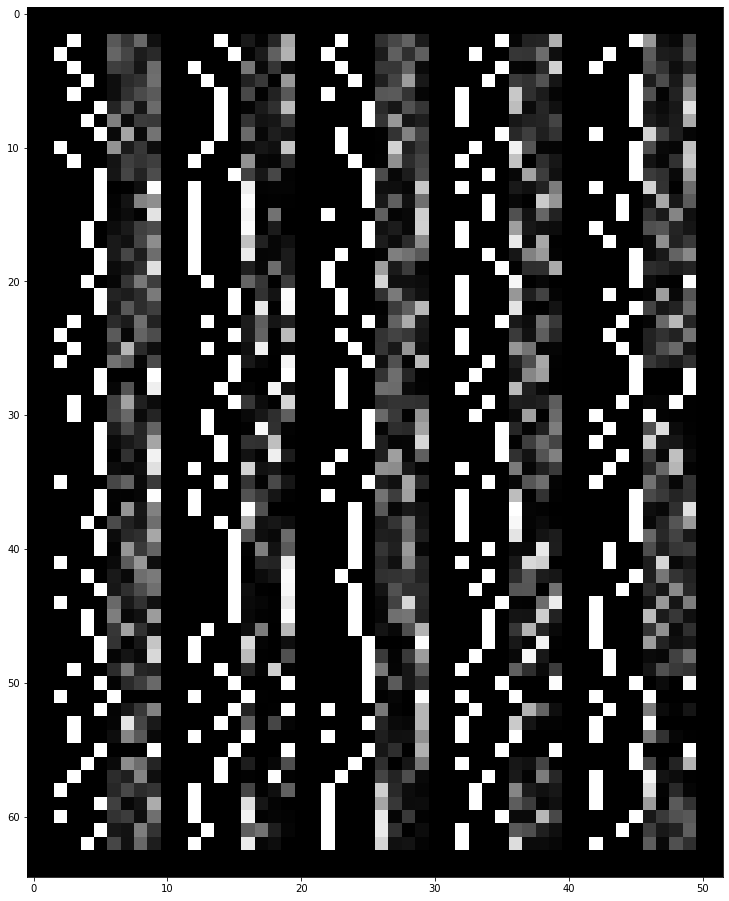

Epoch[876/1000], Step [10/563], Reconst Loss: 704.3005, KL Div: 200.6830
Epoch[876/1000], Step [20/563], Reconst Loss: 546.3749, KL Div: 232.5320
Epoch[876/1000], Step [30/563], Reconst Loss: 703.7847, KL Div: 214.8636
Epoch[876/1000], Step [40/563], Reconst Loss: 660.8207, KL Div: 204.6204
Epoch[876/1000], Step [50/563], Reconst Loss: 619.3076, KL Div: 215.4942
Epoch[876/1000], Step [60/563], Reconst Loss: 637.3311, KL Div: 209.9361
Epoch[876/1000], Step [70/563], Reconst Loss: 701.9661, KL Div: 202.9619
Epoch[876/1000], Step [80/563], Reconst Loss: 733.4177, KL Div: 199.7737
Epoch[876/1000], Step [90/563], Reconst Loss: 678.9283, KL Div: 209.5810
Epoch[876/1000], Step [100/563], Reconst Loss: 619.6660, KL Div: 229.6896
Epoch[876/1000], Step [110/563], Reconst Loss: 738.3196, KL Div: 194.0593
Epoch[876/1000], Step [120/563], Reconst Loss: 782.5977, KL Div: 195.8696
Epoch[876/1000], Step [130/563], Reconst Loss: 697.5073, KL Div: 218.4408
Epoch[876/1000], Step [140/563], Reconst Loss: 

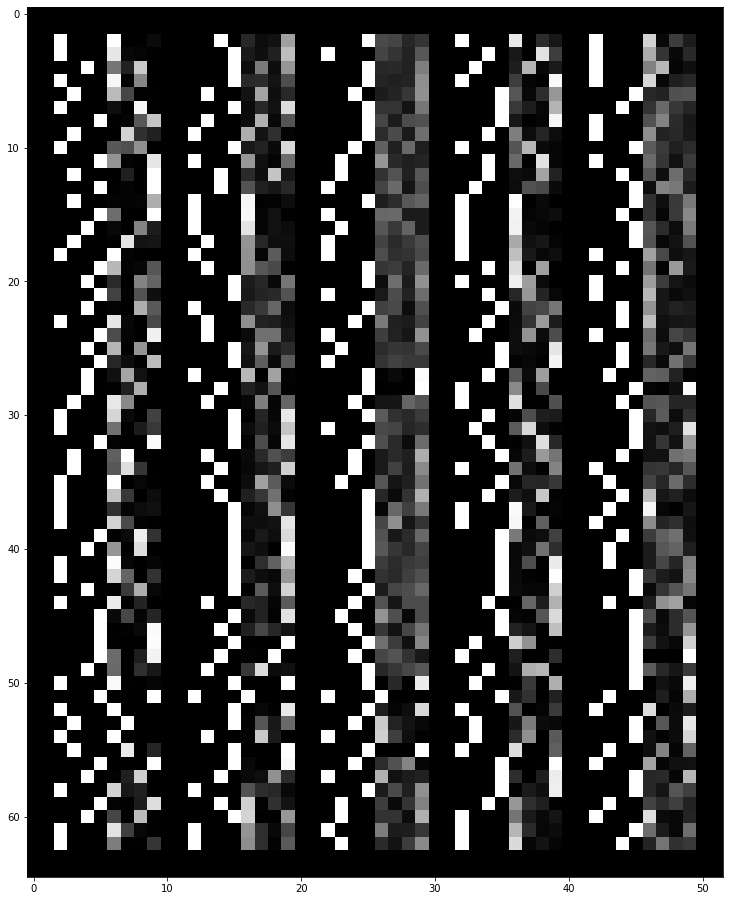

Epoch[877/1000], Step [10/563], Reconst Loss: 717.9376, KL Div: 205.1723
Epoch[877/1000], Step [20/563], Reconst Loss: 657.7517, KL Div: 210.1194
Epoch[877/1000], Step [30/563], Reconst Loss: 545.2334, KL Div: 239.3804
Epoch[877/1000], Step [40/563], Reconst Loss: 607.3903, KL Div: 219.7270
Epoch[877/1000], Step [50/563], Reconst Loss: 587.5443, KL Div: 219.4525
Epoch[877/1000], Step [60/563], Reconst Loss: 641.9724, KL Div: 213.0521
Epoch[877/1000], Step [70/563], Reconst Loss: 670.5105, KL Div: 215.4986
Epoch[877/1000], Step [80/563], Reconst Loss: 677.4613, KL Div: 210.6613
Epoch[877/1000], Step [90/563], Reconst Loss: 633.6921, KL Div: 217.4475
Epoch[877/1000], Step [100/563], Reconst Loss: 648.4658, KL Div: 226.0076
Epoch[877/1000], Step [110/563], Reconst Loss: 550.0083, KL Div: 233.6739
Epoch[877/1000], Step [120/563], Reconst Loss: 573.5238, KL Div: 213.5495
Epoch[877/1000], Step [130/563], Reconst Loss: 526.6619, KL Div: 251.1651
Epoch[877/1000], Step [140/563], Reconst Loss: 

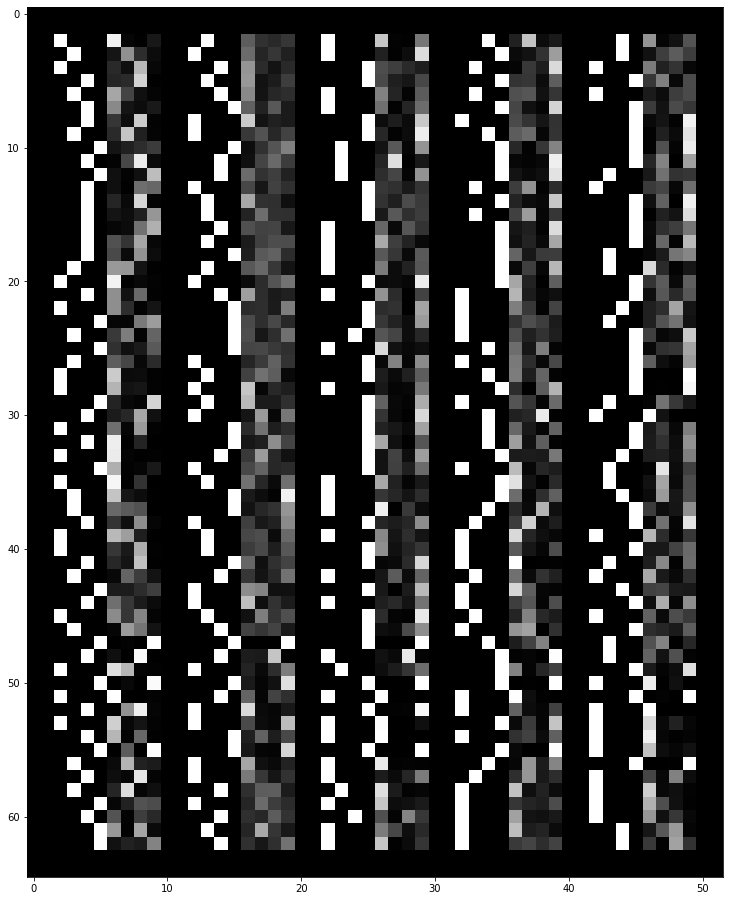

Epoch[878/1000], Step [10/563], Reconst Loss: 681.9740, KL Div: 208.5139
Epoch[878/1000], Step [20/563], Reconst Loss: 787.4012, KL Div: 188.5046
Epoch[878/1000], Step [30/563], Reconst Loss: 721.1486, KL Div: 195.7011
Epoch[878/1000], Step [40/563], Reconst Loss: 734.8152, KL Div: 196.7166
Epoch[878/1000], Step [50/563], Reconst Loss: 780.8940, KL Div: 188.1620
Epoch[878/1000], Step [60/563], Reconst Loss: 690.1741, KL Div: 204.3658
Epoch[878/1000], Step [70/563], Reconst Loss: 633.5806, KL Div: 217.0919
Epoch[878/1000], Step [80/563], Reconst Loss: 746.1223, KL Div: 200.0190
Epoch[878/1000], Step [90/563], Reconst Loss: 705.9668, KL Div: 213.4519
Epoch[878/1000], Step [100/563], Reconst Loss: 604.0166, KL Div: 219.4279
Epoch[878/1000], Step [110/563], Reconst Loss: 725.2098, KL Div: 197.5535
Epoch[878/1000], Step [120/563], Reconst Loss: 728.1202, KL Div: 194.0958
Epoch[878/1000], Step [130/563], Reconst Loss: 694.5012, KL Div: 197.1326
Epoch[878/1000], Step [140/563], Reconst Loss: 

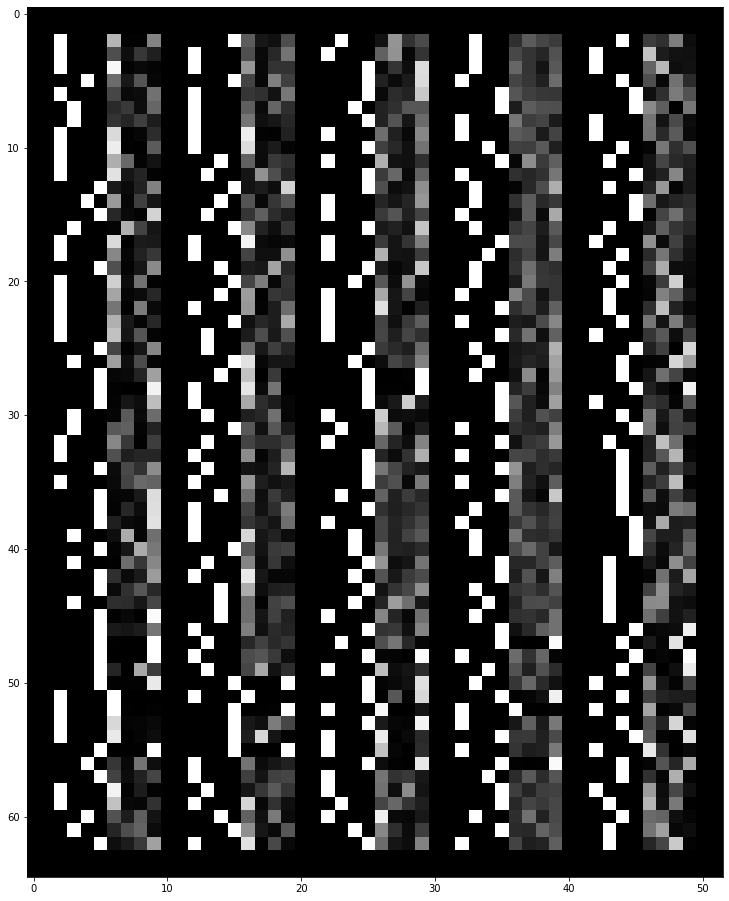

Epoch[879/1000], Step [10/563], Reconst Loss: 634.7863, KL Div: 217.3286
Epoch[879/1000], Step [20/563], Reconst Loss: 734.9284, KL Div: 204.3113
Epoch[879/1000], Step [30/563], Reconst Loss: 614.5232, KL Div: 221.4283
Epoch[879/1000], Step [40/563], Reconst Loss: 596.3986, KL Div: 231.4334
Epoch[879/1000], Step [50/563], Reconst Loss: 734.7656, KL Div: 197.8461
Epoch[879/1000], Step [60/563], Reconst Loss: 771.7147, KL Div: 190.9040
Epoch[879/1000], Step [70/563], Reconst Loss: 639.6680, KL Div: 222.1047
Epoch[879/1000], Step [80/563], Reconst Loss: 615.1796, KL Div: 215.0419
Epoch[879/1000], Step [90/563], Reconst Loss: 732.8485, KL Div: 199.7445
Epoch[879/1000], Step [100/563], Reconst Loss: 736.2275, KL Div: 191.9110
Epoch[879/1000], Step [110/563], Reconst Loss: 644.3443, KL Div: 222.0505
Epoch[879/1000], Step [120/563], Reconst Loss: 704.3903, KL Div: 194.5696
Epoch[879/1000], Step [130/563], Reconst Loss: 673.6265, KL Div: 206.2415
Epoch[879/1000], Step [140/563], Reconst Loss: 

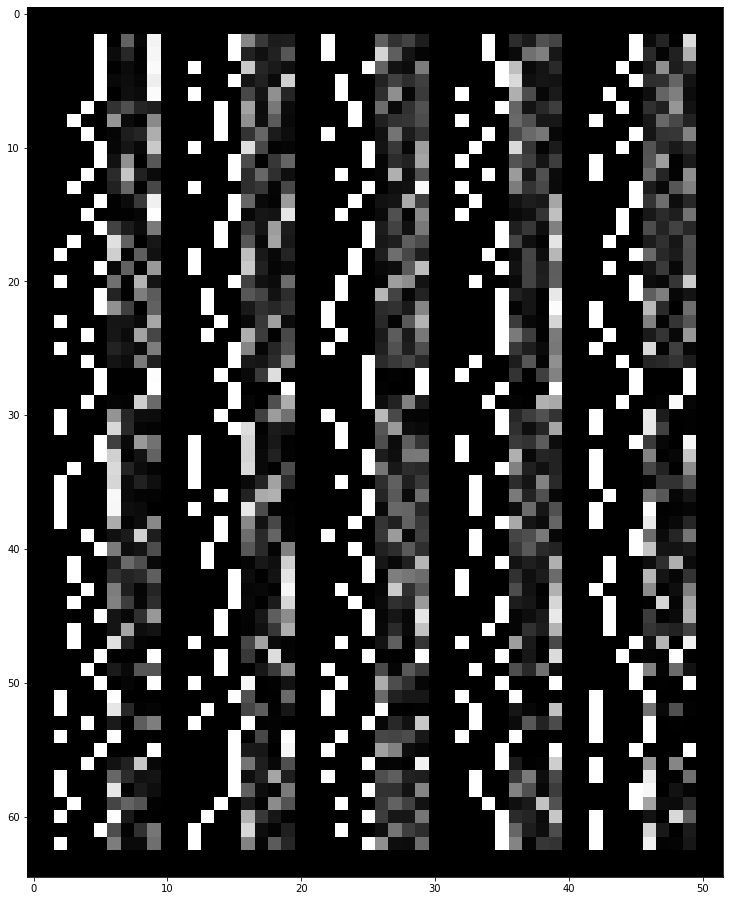

Epoch[880/1000], Step [10/563], Reconst Loss: 778.1867, KL Div: 181.7640
Epoch[880/1000], Step [20/563], Reconst Loss: 650.6400, KL Div: 215.2798
Epoch[880/1000], Step [30/563], Reconst Loss: 707.4091, KL Div: 198.3025
Epoch[880/1000], Step [40/563], Reconst Loss: 681.1354, KL Div: 210.2987
Epoch[880/1000], Step [50/563], Reconst Loss: 688.5269, KL Div: 196.3285
Epoch[880/1000], Step [60/563], Reconst Loss: 671.2836, KL Div: 222.7826
Epoch[880/1000], Step [70/563], Reconst Loss: 687.7673, KL Div: 212.2802
Epoch[880/1000], Step [80/563], Reconst Loss: 756.8380, KL Div: 191.6215
Epoch[880/1000], Step [90/563], Reconst Loss: 739.1598, KL Div: 190.3326
Epoch[880/1000], Step [100/563], Reconst Loss: 599.6335, KL Div: 235.2484
Epoch[880/1000], Step [110/563], Reconst Loss: 756.1569, KL Div: 191.0746
Epoch[880/1000], Step [120/563], Reconst Loss: 687.8512, KL Div: 203.3108
Epoch[880/1000], Step [130/563], Reconst Loss: 689.3712, KL Div: 196.9918
Epoch[880/1000], Step [140/563], Reconst Loss: 

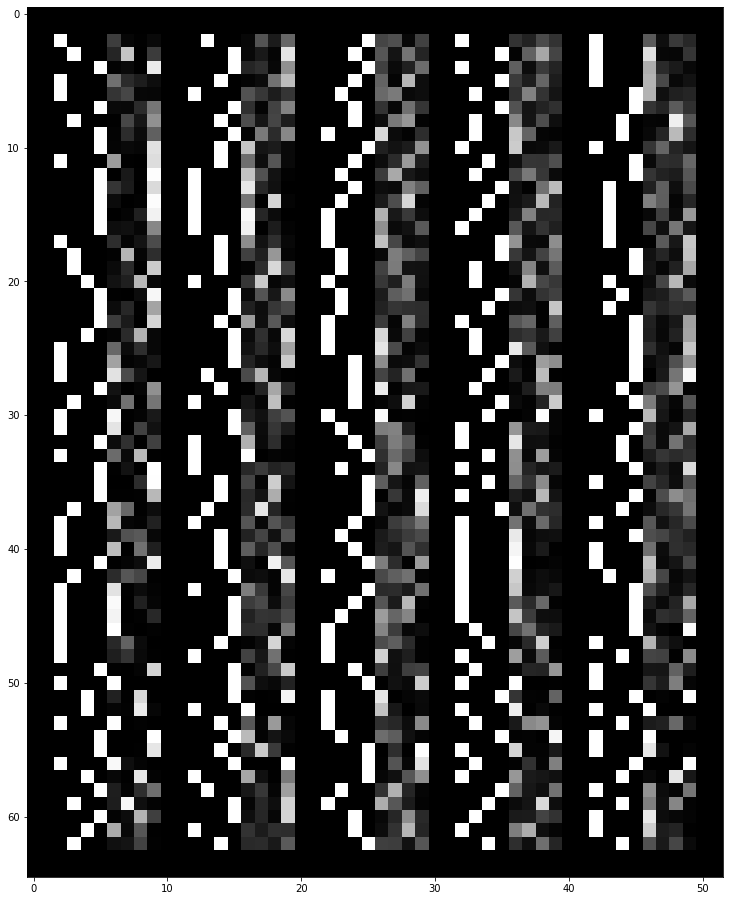

Epoch[881/1000], Step [10/563], Reconst Loss: 799.1116, KL Div: 184.7946
Epoch[881/1000], Step [20/563], Reconst Loss: 683.3744, KL Div: 199.0322
Epoch[881/1000], Step [30/563], Reconst Loss: 666.9216, KL Div: 210.4159
Epoch[881/1000], Step [40/563], Reconst Loss: 732.8552, KL Div: 199.3961
Epoch[881/1000], Step [50/563], Reconst Loss: 585.4012, KL Div: 225.0463
Epoch[881/1000], Step [60/563], Reconst Loss: 596.7850, KL Div: 209.0504
Epoch[881/1000], Step [70/563], Reconst Loss: 803.4983, KL Div: 185.4682
Epoch[881/1000], Step [80/563], Reconst Loss: 620.3369, KL Div: 214.6808
Epoch[881/1000], Step [90/563], Reconst Loss: 574.9205, KL Div: 235.8571
Epoch[881/1000], Step [100/563], Reconst Loss: 694.2434, KL Div: 205.1815
Epoch[881/1000], Step [110/563], Reconst Loss: 716.5923, KL Div: 210.1335
Epoch[881/1000], Step [120/563], Reconst Loss: 646.0807, KL Div: 211.6812
Epoch[881/1000], Step [130/563], Reconst Loss: 637.9094, KL Div: 224.8853
Epoch[881/1000], Step [140/563], Reconst Loss: 

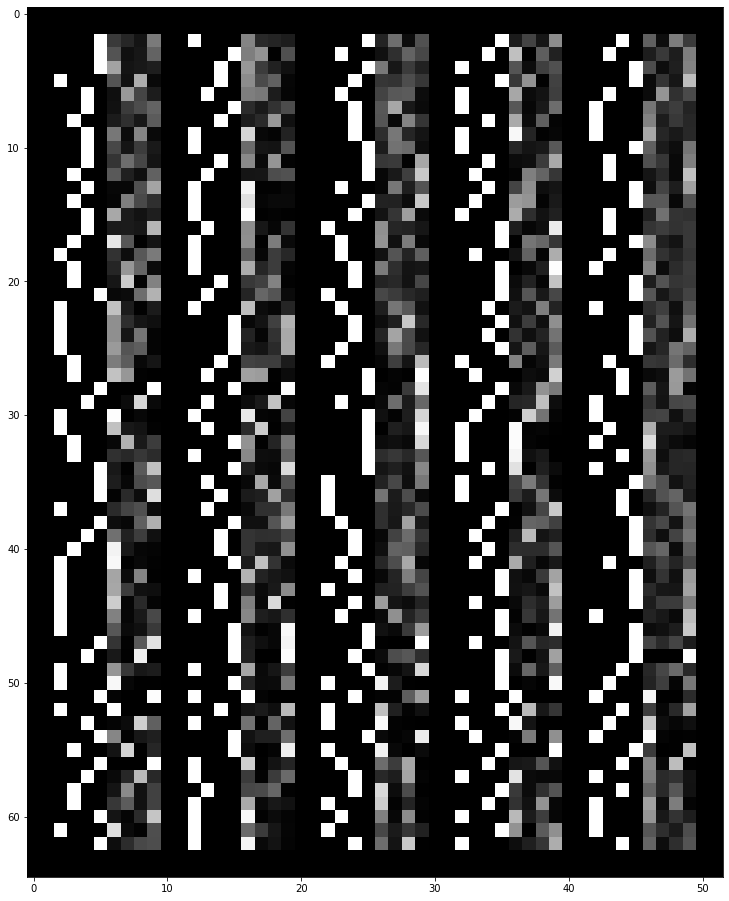

Epoch[882/1000], Step [10/563], Reconst Loss: 663.4359, KL Div: 206.5633
Epoch[882/1000], Step [20/563], Reconst Loss: 794.1948, KL Div: 181.1750
Epoch[882/1000], Step [30/563], Reconst Loss: 703.4374, KL Div: 203.4780
Epoch[882/1000], Step [40/563], Reconst Loss: 672.2363, KL Div: 220.2712
Epoch[882/1000], Step [50/563], Reconst Loss: 653.2220, KL Div: 211.8988
Epoch[882/1000], Step [60/563], Reconst Loss: 629.4341, KL Div: 218.5086
Epoch[882/1000], Step [70/563], Reconst Loss: 653.7257, KL Div: 212.3108
Epoch[882/1000], Step [80/563], Reconst Loss: 780.3058, KL Div: 194.2815
Epoch[882/1000], Step [90/563], Reconst Loss: 710.1643, KL Div: 208.3828
Epoch[882/1000], Step [100/563], Reconst Loss: 708.7505, KL Div: 210.7601
Epoch[882/1000], Step [110/563], Reconst Loss: 632.8704, KL Div: 219.5923
Epoch[882/1000], Step [120/563], Reconst Loss: 579.0018, KL Div: 229.4529
Epoch[882/1000], Step [130/563], Reconst Loss: 728.9831, KL Div: 199.7402
Epoch[882/1000], Step [140/563], Reconst Loss: 

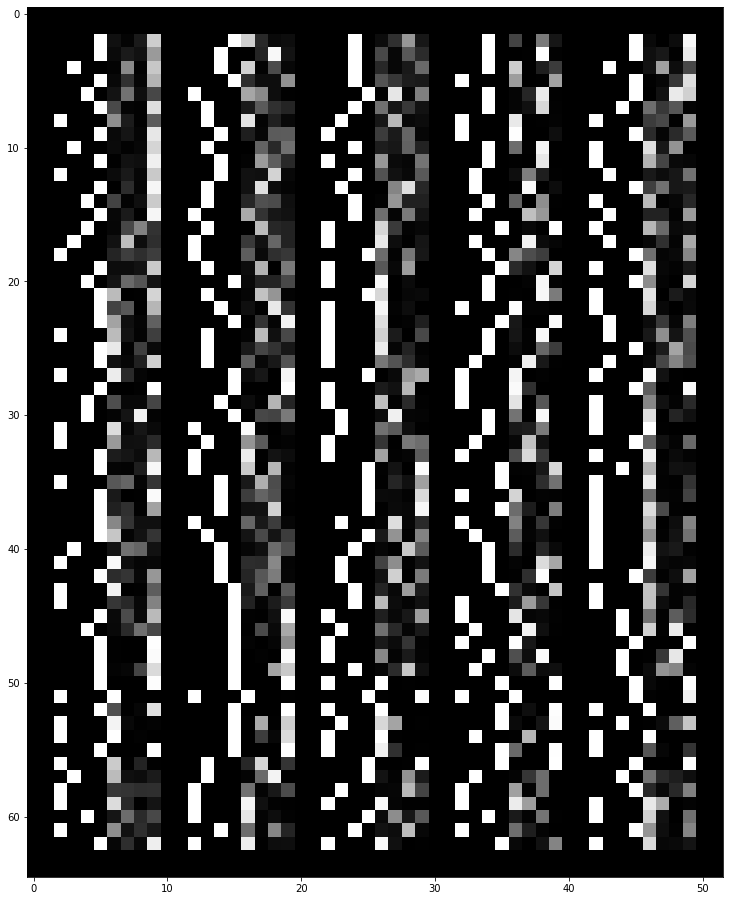

Epoch[883/1000], Step [10/563], Reconst Loss: 696.2261, KL Div: 209.6247
Epoch[883/1000], Step [20/563], Reconst Loss: 740.7327, KL Div: 190.0281
Epoch[883/1000], Step [30/563], Reconst Loss: 704.4678, KL Div: 215.2844
Epoch[883/1000], Step [40/563], Reconst Loss: 685.4106, KL Div: 208.7373
Epoch[883/1000], Step [50/563], Reconst Loss: 599.5425, KL Div: 217.0422
Epoch[883/1000], Step [60/563], Reconst Loss: 632.0983, KL Div: 215.7885
Epoch[883/1000], Step [70/563], Reconst Loss: 689.9321, KL Div: 199.9205
Epoch[883/1000], Step [80/563], Reconst Loss: 689.5502, KL Div: 200.8888
Epoch[883/1000], Step [90/563], Reconst Loss: 636.9832, KL Div: 213.7594
Epoch[883/1000], Step [100/563], Reconst Loss: 714.9167, KL Div: 200.8987
Epoch[883/1000], Step [110/563], Reconst Loss: 623.7079, KL Div: 207.1996
Epoch[883/1000], Step [120/563], Reconst Loss: 763.0850, KL Div: 188.0098
Epoch[883/1000], Step [130/563], Reconst Loss: 647.9438, KL Div: 221.6244
Epoch[883/1000], Step [140/563], Reconst Loss: 

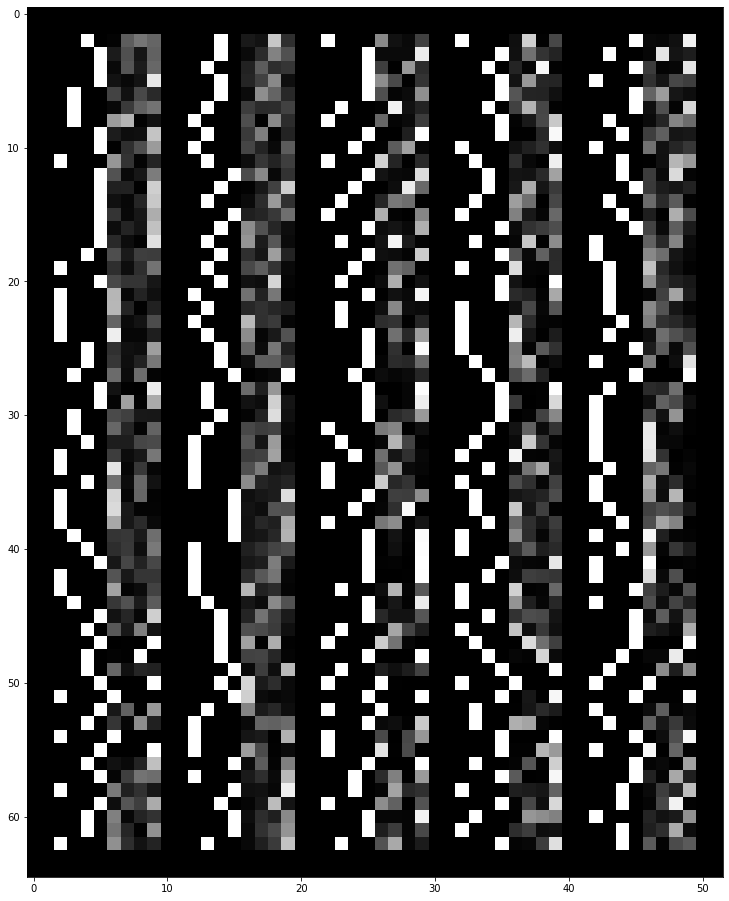

Epoch[884/1000], Step [10/563], Reconst Loss: 727.1252, KL Div: 204.3890
Epoch[884/1000], Step [20/563], Reconst Loss: 619.6465, KL Div: 220.4038
Epoch[884/1000], Step [30/563], Reconst Loss: 721.7273, KL Div: 209.3742
Epoch[884/1000], Step [40/563], Reconst Loss: 663.4200, KL Div: 209.8656
Epoch[884/1000], Step [50/563], Reconst Loss: 632.3775, KL Div: 219.6928
Epoch[884/1000], Step [60/563], Reconst Loss: 670.9781, KL Div: 210.3476
Epoch[884/1000], Step [70/563], Reconst Loss: 672.6734, KL Div: 216.3951
Epoch[884/1000], Step [80/563], Reconst Loss: 703.1694, KL Div: 207.7811
Epoch[884/1000], Step [90/563], Reconst Loss: 724.0077, KL Div: 201.6442
Epoch[884/1000], Step [100/563], Reconst Loss: 675.7986, KL Div: 212.7845
Epoch[884/1000], Step [110/563], Reconst Loss: 718.3521, KL Div: 197.1069
Epoch[884/1000], Step [120/563], Reconst Loss: 678.1161, KL Div: 211.9695
Epoch[884/1000], Step [130/563], Reconst Loss: 739.3307, KL Div: 200.1481
Epoch[884/1000], Step [140/563], Reconst Loss: 

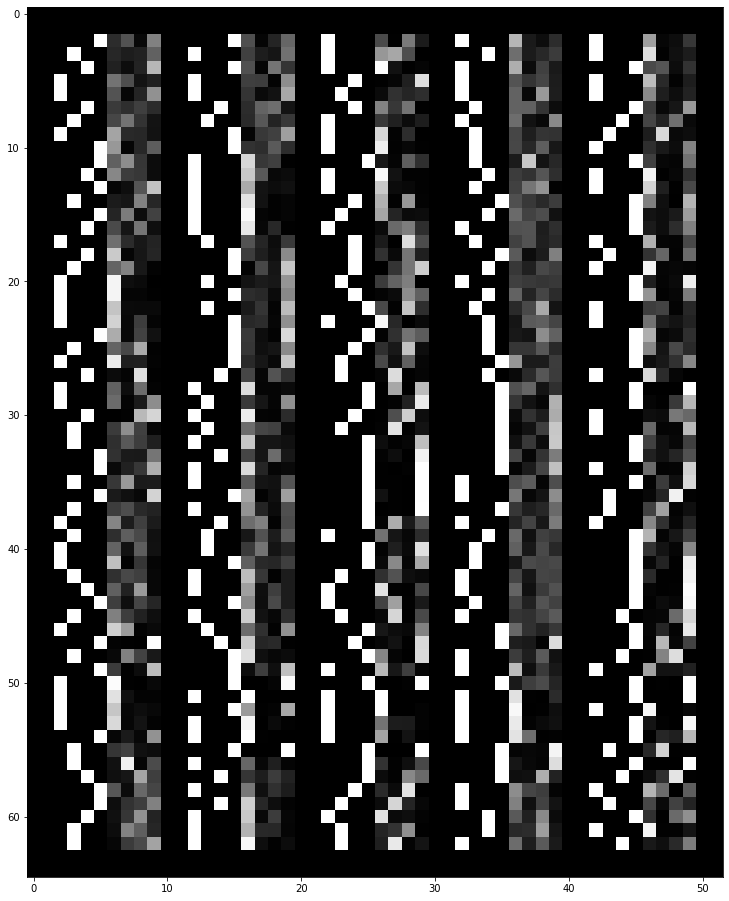

Epoch[885/1000], Step [10/563], Reconst Loss: 702.6466, KL Div: 204.6666
Epoch[885/1000], Step [20/563], Reconst Loss: 657.3325, KL Div: 217.4077
Epoch[885/1000], Step [30/563], Reconst Loss: 730.1975, KL Div: 206.5079
Epoch[885/1000], Step [40/563], Reconst Loss: 646.9424, KL Div: 214.3431
Epoch[885/1000], Step [50/563], Reconst Loss: 613.4585, KL Div: 221.4980
Epoch[885/1000], Step [60/563], Reconst Loss: 579.4022, KL Div: 227.4183
Epoch[885/1000], Step [70/563], Reconst Loss: 692.4470, KL Div: 205.3892
Epoch[885/1000], Step [80/563], Reconst Loss: 756.3995, KL Div: 198.9566
Epoch[885/1000], Step [90/563], Reconst Loss: 682.7345, KL Div: 221.4707
Epoch[885/1000], Step [100/563], Reconst Loss: 651.8208, KL Div: 209.2621
Epoch[885/1000], Step [110/563], Reconst Loss: 715.6544, KL Div: 205.5181
Epoch[885/1000], Step [120/563], Reconst Loss: 745.7705, KL Div: 193.8591
Epoch[885/1000], Step [130/563], Reconst Loss: 571.8066, KL Div: 230.7454
Epoch[885/1000], Step [140/563], Reconst Loss: 

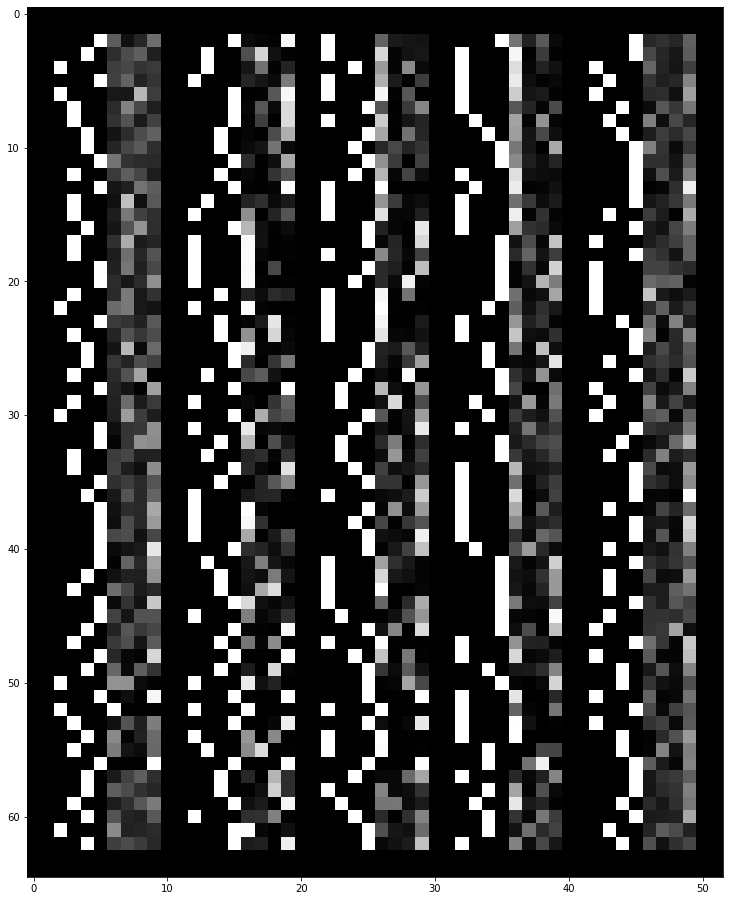

Epoch[886/1000], Step [10/563], Reconst Loss: 730.6664, KL Div: 204.7423
Epoch[886/1000], Step [20/563], Reconst Loss: 693.1002, KL Div: 193.7305
Epoch[886/1000], Step [30/563], Reconst Loss: 758.7070, KL Div: 191.8161
Epoch[886/1000], Step [40/563], Reconst Loss: 597.2498, KL Div: 227.1432
Epoch[886/1000], Step [50/563], Reconst Loss: 703.9286, KL Div: 209.0799
Epoch[886/1000], Step [60/563], Reconst Loss: 701.1577, KL Div: 205.6646
Epoch[886/1000], Step [70/563], Reconst Loss: 711.1743, KL Div: 194.8609
Epoch[886/1000], Step [80/563], Reconst Loss: 667.7457, KL Div: 199.6746
Epoch[886/1000], Step [90/563], Reconst Loss: 558.8233, KL Div: 232.3055
Epoch[886/1000], Step [100/563], Reconst Loss: 590.8872, KL Div: 218.3589
Epoch[886/1000], Step [110/563], Reconst Loss: 704.4440, KL Div: 208.4734
Epoch[886/1000], Step [120/563], Reconst Loss: 648.9878, KL Div: 211.2090
Epoch[886/1000], Step [130/563], Reconst Loss: 618.9529, KL Div: 214.6924
Epoch[886/1000], Step [140/563], Reconst Loss: 

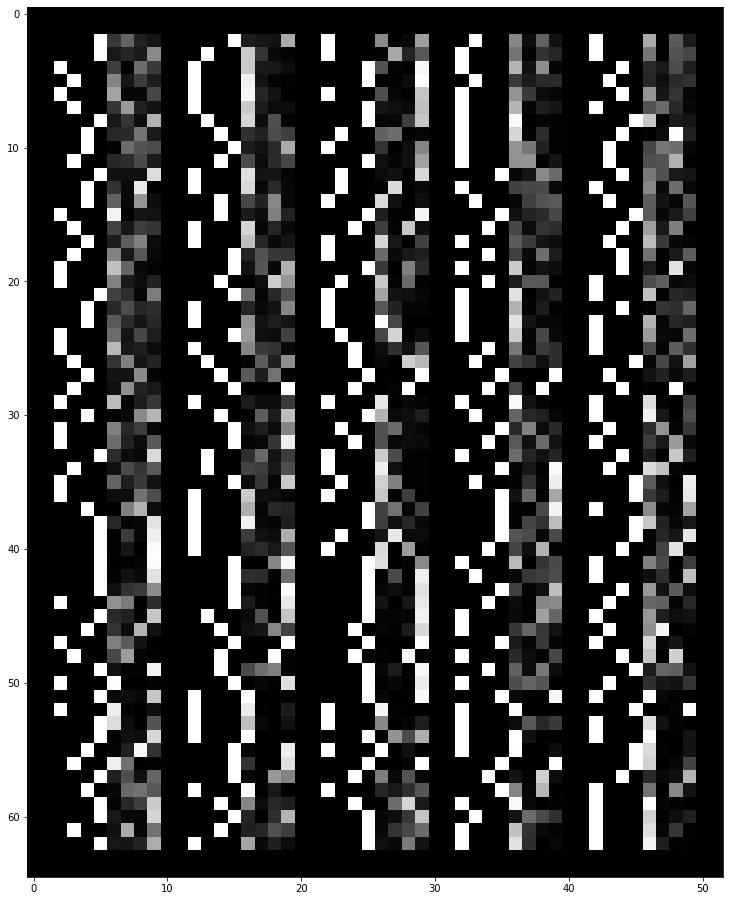

Epoch[887/1000], Step [10/563], Reconst Loss: 695.4857, KL Div: 215.5133
Epoch[887/1000], Step [20/563], Reconst Loss: 641.9491, KL Div: 221.0359
Epoch[887/1000], Step [30/563], Reconst Loss: 751.7478, KL Div: 198.1520
Epoch[887/1000], Step [40/563], Reconst Loss: 623.2812, KL Div: 213.2444
Epoch[887/1000], Step [50/563], Reconst Loss: 649.9804, KL Div: 222.4461
Epoch[887/1000], Step [60/563], Reconst Loss: 652.7920, KL Div: 212.3453
Epoch[887/1000], Step [70/563], Reconst Loss: 683.1840, KL Div: 204.2715
Epoch[887/1000], Step [80/563], Reconst Loss: 619.2678, KL Div: 218.1987
Epoch[887/1000], Step [90/563], Reconst Loss: 705.8623, KL Div: 203.4583
Epoch[887/1000], Step [100/563], Reconst Loss: 670.7719, KL Div: 203.1500
Epoch[887/1000], Step [110/563], Reconst Loss: 639.5546, KL Div: 212.2242
Epoch[887/1000], Step [120/563], Reconst Loss: 767.6749, KL Div: 187.8518
Epoch[887/1000], Step [130/563], Reconst Loss: 608.9418, KL Div: 194.5653
Epoch[887/1000], Step [140/563], Reconst Loss: 

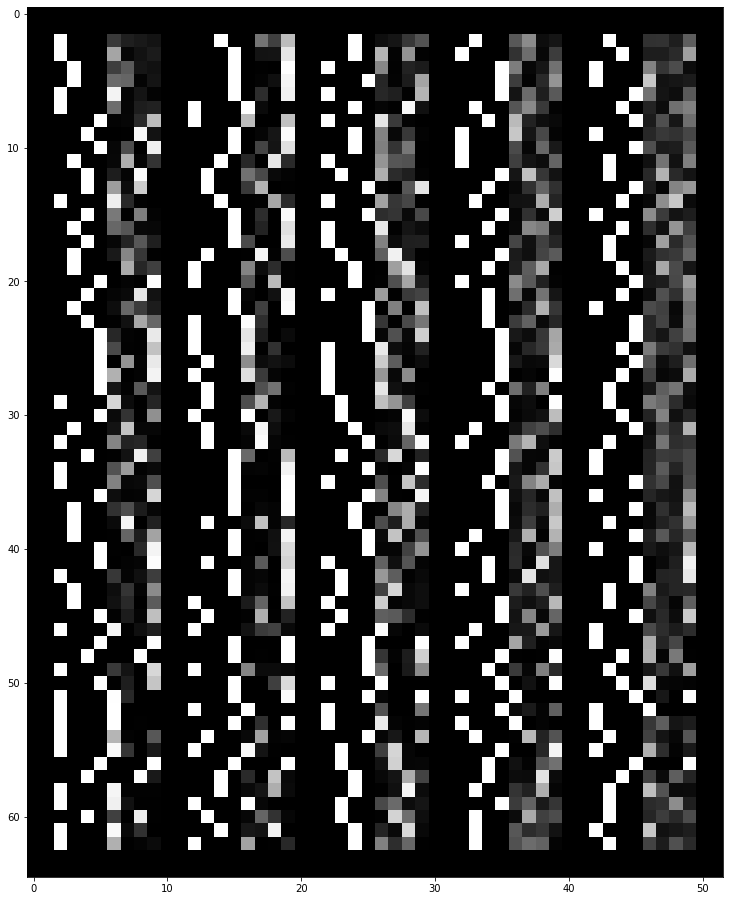

Epoch[888/1000], Step [10/563], Reconst Loss: 628.1107, KL Div: 220.0395
Epoch[888/1000], Step [20/563], Reconst Loss: 665.0709, KL Div: 202.8692
Epoch[888/1000], Step [30/563], Reconst Loss: 734.2269, KL Div: 214.3969
Epoch[888/1000], Step [40/563], Reconst Loss: 659.1418, KL Div: 213.1312
Epoch[888/1000], Step [50/563], Reconst Loss: 771.9331, KL Div: 192.9471
Epoch[888/1000], Step [60/563], Reconst Loss: 704.9069, KL Div: 199.1794
Epoch[888/1000], Step [70/563], Reconst Loss: 698.9876, KL Div: 197.2050
Epoch[888/1000], Step [80/563], Reconst Loss: 639.3000, KL Div: 208.1394
Epoch[888/1000], Step [90/563], Reconst Loss: 705.5011, KL Div: 203.4926
Epoch[888/1000], Step [100/563], Reconst Loss: 677.3640, KL Div: 208.5746
Epoch[888/1000], Step [110/563], Reconst Loss: 762.6075, KL Div: 200.4980
Epoch[888/1000], Step [120/563], Reconst Loss: 655.4607, KL Div: 215.0741
Epoch[888/1000], Step [130/563], Reconst Loss: 710.1825, KL Div: 210.8700
Epoch[888/1000], Step [140/563], Reconst Loss: 

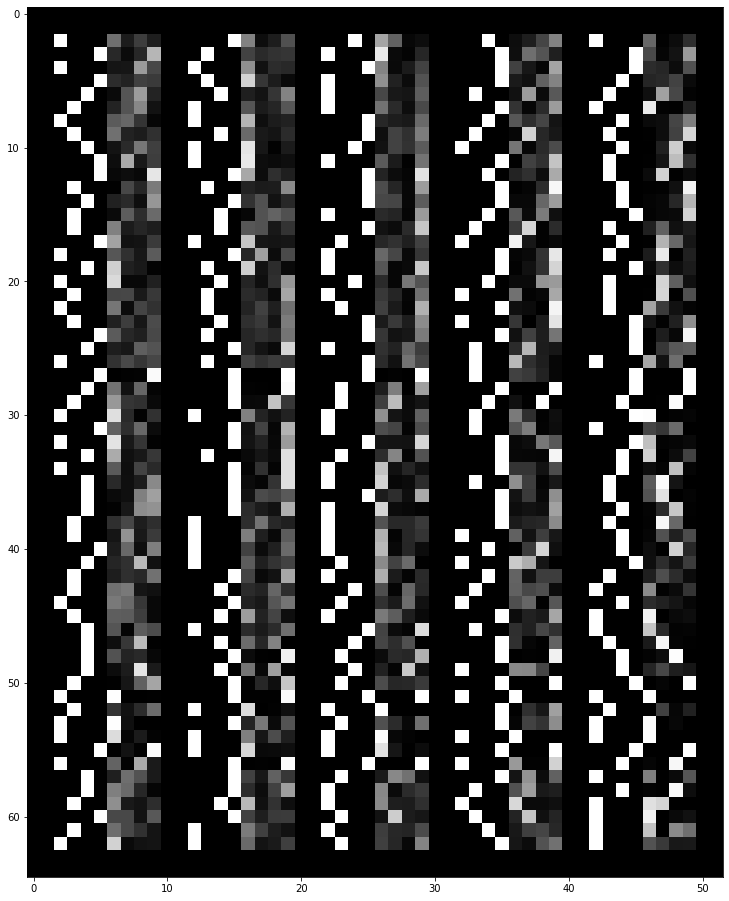

Epoch[889/1000], Step [10/563], Reconst Loss: 648.1868, KL Div: 215.1591
Epoch[889/1000], Step [20/563], Reconst Loss: 670.1773, KL Div: 211.4505
Epoch[889/1000], Step [30/563], Reconst Loss: 673.0870, KL Div: 216.4036
Epoch[889/1000], Step [40/563], Reconst Loss: 637.1841, KL Div: 213.7744
Epoch[889/1000], Step [50/563], Reconst Loss: 660.4955, KL Div: 218.0948
Epoch[889/1000], Step [60/563], Reconst Loss: 769.1521, KL Div: 193.0563
Epoch[889/1000], Step [70/563], Reconst Loss: 645.3881, KL Div: 218.8860
Epoch[889/1000], Step [80/563], Reconst Loss: 675.2924, KL Div: 215.1089
Epoch[889/1000], Step [90/563], Reconst Loss: 732.6918, KL Div: 203.3129
Epoch[889/1000], Step [100/563], Reconst Loss: 589.6991, KL Div: 218.2720
Epoch[889/1000], Step [110/563], Reconst Loss: 754.0015, KL Div: 198.2606
Epoch[889/1000], Step [120/563], Reconst Loss: 685.0782, KL Div: 212.0855
Epoch[889/1000], Step [130/563], Reconst Loss: 629.6567, KL Div: 201.8663
Epoch[889/1000], Step [140/563], Reconst Loss: 

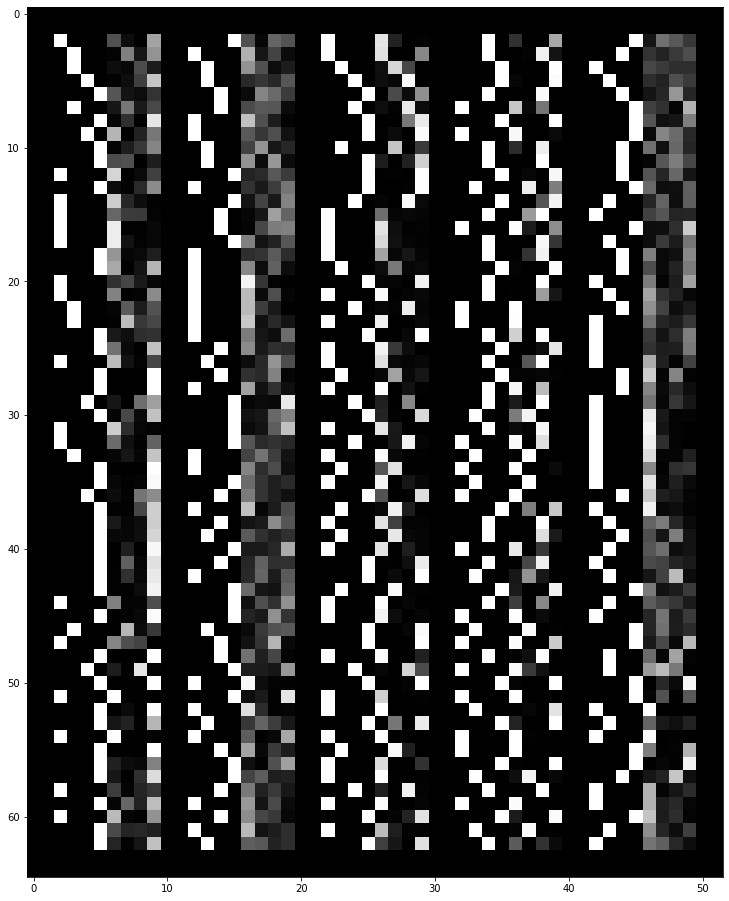

Epoch[890/1000], Step [10/563], Reconst Loss: 731.1338, KL Div: 199.3873
Epoch[890/1000], Step [20/563], Reconst Loss: 697.2589, KL Div: 193.5000
Epoch[890/1000], Step [30/563], Reconst Loss: 618.8984, KL Div: 215.9771
Epoch[890/1000], Step [40/563], Reconst Loss: 651.5558, KL Div: 206.3962
Epoch[890/1000], Step [50/563], Reconst Loss: 699.5340, KL Div: 204.0814
Epoch[890/1000], Step [60/563], Reconst Loss: 740.4619, KL Div: 198.5840
Epoch[890/1000], Step [70/563], Reconst Loss: 754.2663, KL Div: 196.9969
Epoch[890/1000], Step [80/563], Reconst Loss: 740.6296, KL Div: 192.8506
Epoch[890/1000], Step [90/563], Reconst Loss: 721.5585, KL Div: 206.6127
Epoch[890/1000], Step [100/563], Reconst Loss: 779.1486, KL Div: 192.8749
Epoch[890/1000], Step [110/563], Reconst Loss: 655.6204, KL Div: 199.6412
Epoch[890/1000], Step [120/563], Reconst Loss: 719.1509, KL Div: 202.4978
Epoch[890/1000], Step [130/563], Reconst Loss: 737.4541, KL Div: 201.4970
Epoch[890/1000], Step [140/563], Reconst Loss: 

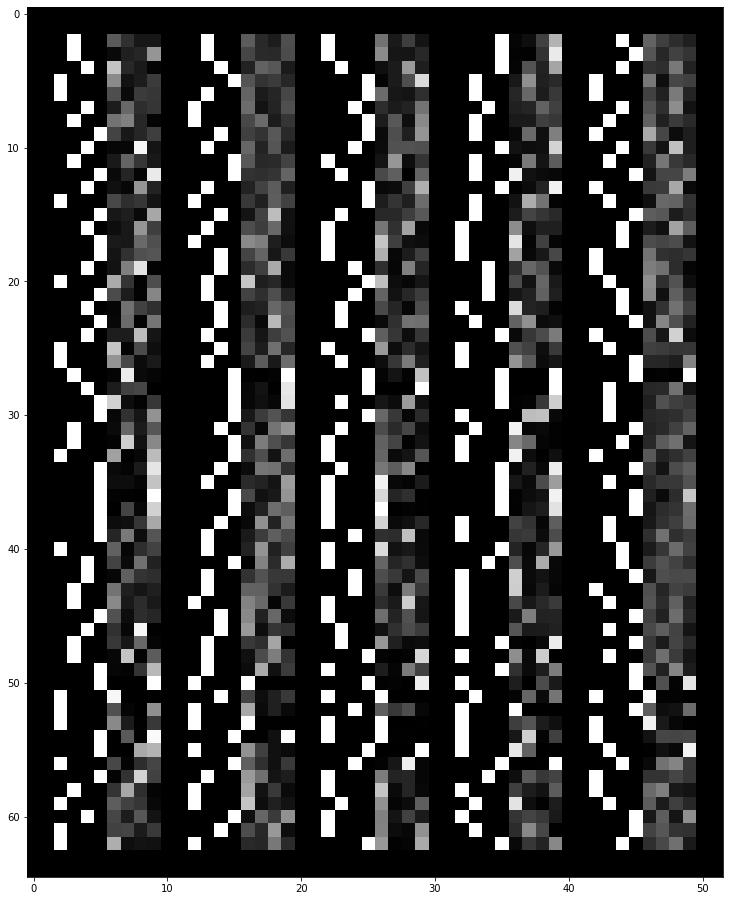

Epoch[891/1000], Step [10/563], Reconst Loss: 714.4731, KL Div: 191.2884
Epoch[891/1000], Step [20/563], Reconst Loss: 726.6981, KL Div: 190.3089
Epoch[891/1000], Step [30/563], Reconst Loss: 642.1394, KL Div: 201.5125
Epoch[891/1000], Step [40/563], Reconst Loss: 658.5411, KL Div: 203.4751
Epoch[891/1000], Step [50/563], Reconst Loss: 536.2957, KL Div: 242.5344
Epoch[891/1000], Step [60/563], Reconst Loss: 649.3999, KL Div: 217.4210
Epoch[891/1000], Step [70/563], Reconst Loss: 679.7754, KL Div: 202.3000
Epoch[891/1000], Step [80/563], Reconst Loss: 691.5994, KL Div: 206.6668
Epoch[891/1000], Step [90/563], Reconst Loss: 800.6906, KL Div: 174.8646
Epoch[891/1000], Step [100/563], Reconst Loss: 692.9457, KL Div: 215.2139
Epoch[891/1000], Step [110/563], Reconst Loss: 731.8839, KL Div: 188.8575
Epoch[891/1000], Step [120/563], Reconst Loss: 689.7668, KL Div: 202.9498
Epoch[891/1000], Step [130/563], Reconst Loss: 660.7706, KL Div: 208.3505
Epoch[891/1000], Step [140/563], Reconst Loss: 

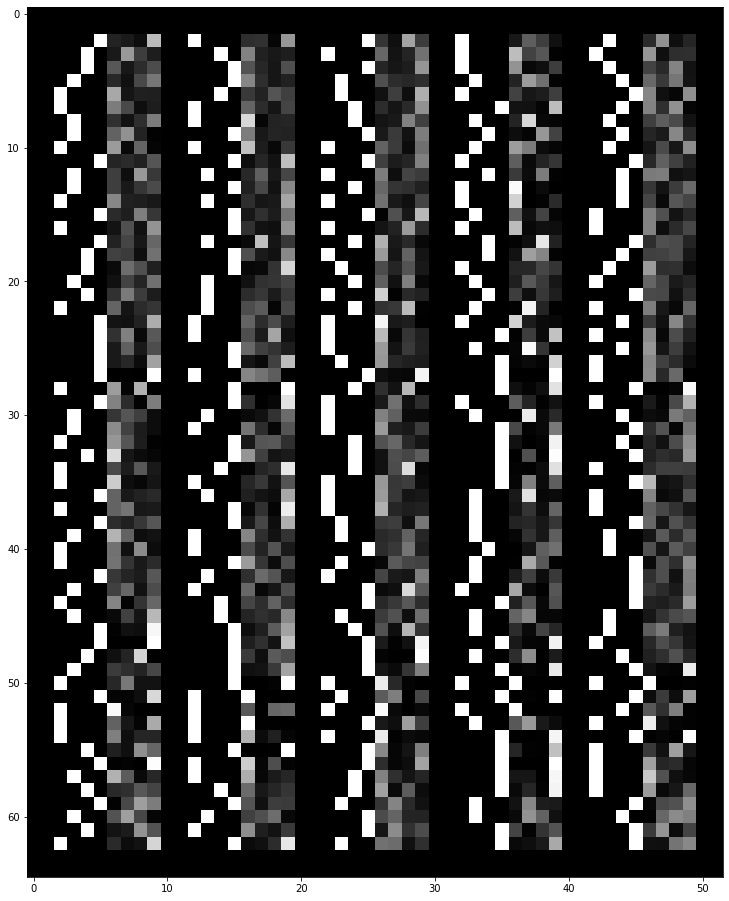

Epoch[892/1000], Step [10/563], Reconst Loss: 660.7823, KL Div: 206.6203
Epoch[892/1000], Step [20/563], Reconst Loss: 733.4888, KL Div: 201.7058
Epoch[892/1000], Step [30/563], Reconst Loss: 746.9283, KL Div: 198.6313
Epoch[892/1000], Step [40/563], Reconst Loss: 743.8510, KL Div: 198.9513
Epoch[892/1000], Step [50/563], Reconst Loss: 686.2268, KL Div: 211.0374
Epoch[892/1000], Step [60/563], Reconst Loss: 722.6661, KL Div: 201.7628
Epoch[892/1000], Step [70/563], Reconst Loss: 719.9790, KL Div: 204.6951
Epoch[892/1000], Step [80/563], Reconst Loss: 696.3289, KL Div: 202.9267
Epoch[892/1000], Step [90/563], Reconst Loss: 653.1891, KL Div: 206.4628
Epoch[892/1000], Step [100/563], Reconst Loss: 697.7048, KL Div: 208.0651
Epoch[892/1000], Step [110/563], Reconst Loss: 615.8575, KL Div: 221.5156
Epoch[892/1000], Step [120/563], Reconst Loss: 645.2823, KL Div: 215.8315
Epoch[892/1000], Step [130/563], Reconst Loss: 586.6130, KL Div: 232.6946
Epoch[892/1000], Step [140/563], Reconst Loss: 

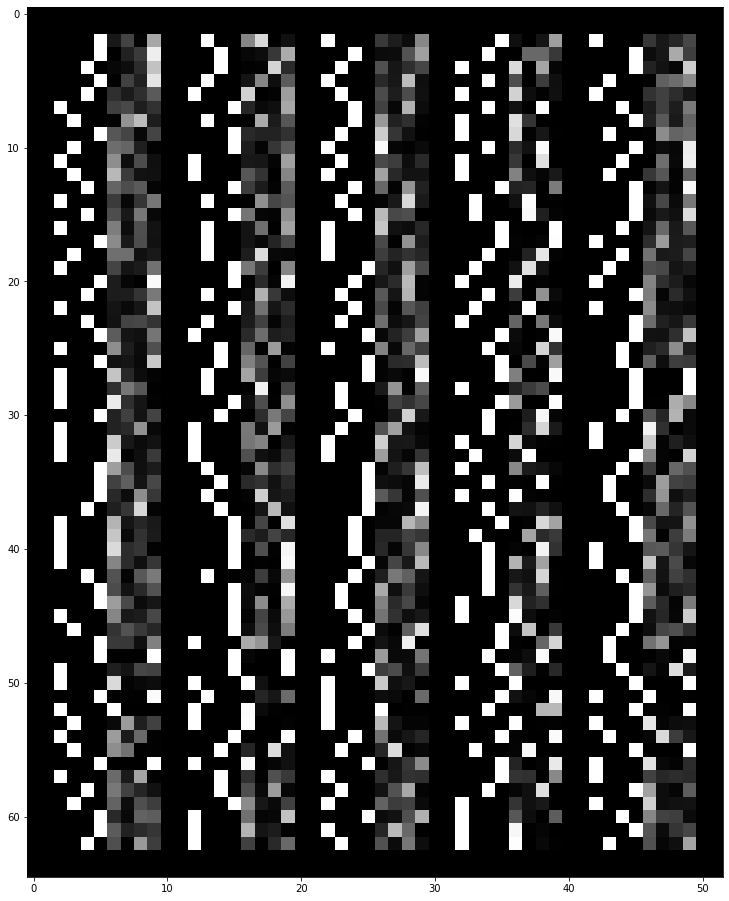

Epoch[893/1000], Step [10/563], Reconst Loss: 690.7504, KL Div: 204.7436
Epoch[893/1000], Step [20/563], Reconst Loss: 681.8634, KL Div: 208.3754
Epoch[893/1000], Step [30/563], Reconst Loss: 644.8400, KL Div: 220.0655
Epoch[893/1000], Step [40/563], Reconst Loss: 693.2106, KL Div: 201.3999
Epoch[893/1000], Step [50/563], Reconst Loss: 664.9926, KL Div: 219.0191
Epoch[893/1000], Step [60/563], Reconst Loss: 677.6727, KL Div: 208.6504
Epoch[893/1000], Step [70/563], Reconst Loss: 615.1287, KL Div: 204.5700
Epoch[893/1000], Step [80/563], Reconst Loss: 652.1281, KL Div: 209.9691
Epoch[893/1000], Step [90/563], Reconst Loss: 593.6317, KL Div: 233.2404
Epoch[893/1000], Step [100/563], Reconst Loss: 760.6974, KL Div: 189.9269
Epoch[893/1000], Step [110/563], Reconst Loss: 586.2300, KL Div: 232.6786
Epoch[893/1000], Step [120/563], Reconst Loss: 660.0614, KL Div: 205.3500
Epoch[893/1000], Step [130/563], Reconst Loss: 624.6803, KL Div: 218.9124
Epoch[893/1000], Step [140/563], Reconst Loss: 

KeyboardInterrupt: ignored

In [95]:
# Trans = transforms.Resize([4,61])
for epoch in range(num_epochs):
    # for i, (x,_) in enumerate(data_loader):
    for i, x in enumerate(data_loader):
        # print(i)

        # 获取样本，并前向传播
        # print("x:",x)
        # plt.imshow(x[0])
        # break
        # x = Trans(x)
        # print("x shape:",x.shape)
        x = x.to(device).view(-1, image_size)
        # print("x.shape after viewed:",x.shape)
        x_reconst, mu, log_var = model(x)
        
        # 计算重构损失和KL散度（KL散度用于衡量两种分布的相似程度）
        # KL散度的计算可以参考论文或者文章开头的链接
        reconst_loss = F.binary_cross_entropy(x_reconst, x, size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # 反向传播和优化
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 10 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item()))
    
    # 利用训练的模型进行测试
    with torch.no_grad():
        # 随机生成的图像
        z = torch.randn(batch_size, z_dim).to(device)
        out = model.decode(z).view(-1, 1, 61, 4)
        print(epoch+1)
        save_image(out, os.path.join(sample_dir, 'sampled-{}.png'.format(epoch+1)))

        # 重构的图像
        out, _, _ = model(x)
        x_concat = torch.cat([x.view(-1, 1, 61, 4), out.view(-1, 1, 61, 4)], dim=3)
        
        save_image(x_concat, os.path.join(sample_dir, 'reconst-{}.png'.format(epoch+1)))
        Image = mpimg.imread('samples/reconst-{}.png'.format(epoch+1))
        print(Image.shape)
        plt.figure(figsize= (40,16))
        plt.imshow(Image) # 显示图片
        # plt.axis('off') # 不显示坐标轴
        plt.show()



(61, 8, 3)


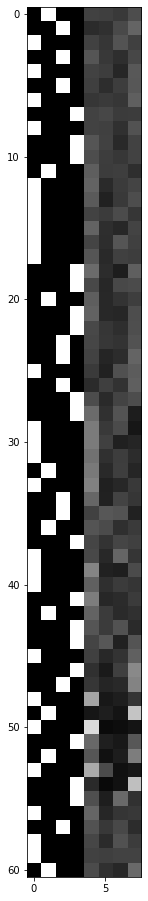

In [76]:

reconsPath = 'samples/reconst-1.png'
Image = mpimg.imread(reconsPath)
print(Image.shape)
plt.figure(figsize= (20,16))
plt.imshow(Image) # 显示图片
# plt.axis('off') # 不显示坐标轴
plt.show()

In [124]:
    # 利用训练的模型进行测试
    seqs = []
    # for times in range(1000):
    for i, x in enumerate(data_loader):
      with torch.no_grad():
          # 随机生成的图像
          x = x.to(device).view(-1, image_size)
          z = torch.randn(batch_size, z_dim).to(device)
          # out = model.decode(z).view(-1, 1, 61, 4)
          # seqs = []
          # for i in out:
          #   tmp = oh2seq(i.cpu(),invcharmap)
          #   seqs.append(tmp)
          # print(epoch+1)
          # save_image(out, os.path.join(sample_dir, 'sampled-{}.png'.format(epoch+1)))
          # Image = mpimg.imread('samples/sampled-{}.png'.format(epoch+1))
          # print(Image.shape)
          # plt.figure(figsize= (20,16))
          # plt.imshow(Image) # 显示图片
          # # plt.axis('off') # 不显示坐标轴
          # plt.show()

        # # 重构的图像
          out, _, _ = model(x.to(device))
          out = out.view(-1, 1, 61, 4)
          for i in out:
            # print(out)
            tmp = oh2seq(i.cpu(),invcharmap)
            seqs.append(tmp)
        # x_concat = torch.cat([x.view(-1, 1, 61, 4), out.view(-1, 1, 61, 4)], dim=3)
        
        # save_image(x_concat, os.path.join(sample_dir, 'reconst-{}.png'.format(epoch+1)))
        # Image = mpimg.imread('samples/reconst-{}.png'.format(epoch+1))
        # print(Image.shape)
        # plt.figure(figsize= (40,16))
        # plt.imshow(Image) # 显示图片
        # # plt.axis('off') # 不显示坐标轴
        # plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [100]:
print(seqs)

[['TTCTTTAGAATTTTAAAAATTTATCCTGAAGCATAAATATTTAAGTGGTTTTATACTGATA'], ['AGATTAAAAAATATGAGAAAAAAAAAATGAAAAAGTATTTTATAAGGTTAAAATGAAATAT'], ['CTTTTTTTAAATAAAAGAGAAGATTGTTTAAATTGATAATGTTGAATTAATATAGGAGGAA'], ['GCCAGGGGTTTTTTCCTGATCTAGTGATTGAGGACTTTGCTGCTCCTATTAAAAAGAAAAA'], ['CCGAATCCGCTGCAGGAAGCGCGCGAAGCCCTATGTGTTGGTATCGGTTTATTCTTCGTCT'], ['AAGGCGTGTATGGTTTTATCACGATTGTGATCAGCAAGCCTGCAGACATTAACCTGGCAAA'], ['GTAAAGTGTGCAAACGAGTTTTTACAAGCCGATCTGGCTTTCATGTAGTTAGATGAGGGGA'], ['ATTGATACCCGCAGTTTATTAAGATAACTTTTTGTTAGTTTTTTTTTCTATGATAAAAAAA']]


In [125]:
print(len(seqs))

4501


In [126]:
with open('recons.txt','w') as f:
  for i in seqs:
    f.write(i[0]+'\n')


In [108]:
torch.save(model.state_dict(), 'save889.pth')